In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

# Expert

In [129]:
dsads_dct = pickle.load(open('dsads_10_5.pkl', 'rb'))
pamap_dct = pickle.load(open('pamap_10_8.pkl', 'rb'))
hapt_dct = pickle.load(open('hapt_10_4.pkl', 'rb'))
wisdm_dct = pickle.load(open('wisdm_10_12.pkl', 'rb'))

dcts = [dsads_dct, pamap_dct, hapt_dct, wisdm_dct, ]

In [130]:
dsads_activities = ['sit', 'stand', 'lay/back', 
                    'lay/right', 'ascend stairs', 
                    'descend stairs', 'elevator stand', 
                    'elevator move', 'walk', 
                    'treadmill flat', 'treadmill inclined', 
                    'run treadmill', 'stepper', 
                    'cross trainer', 'bike horizontal', 
                    'bike vertical', 'row', 'jump', 'basketball']
pamap_activities = ['lay', 'sit', 'stand', 'walk', 
                    'run', 'cycle', 'Nordic walk', 'watch TV', 
                    'computer work', 'drive car', 'ascend stairs', 'descend stairs']
hapt_activities = ['walk', 'walk upstairs', 'walk downstairs', 'sit', 
                    'stand', 'lay', 'stand to sit', 'sit to stand', 'sit to lay',
                    'lay to sit', 'stand to lay', 'lay to stand']
wisdm_activities = ['walk', 'jogging', 'stairs', 'sit',
                    'stand', 'type', 'brush teeth', 'eat soup',
                    'eat chips', 'eat pasta', 'drink',
                    'eat sandwich', 'kick a ball', 'play catch',
                    'dribble', 'write', 'clap', 'fold clothes']

dsads_class_mapped = [dsads_activities[i] for i in dsads_dct['data']['clsorder']]
pamap_class_mapped = [pamap_activities[i] for i in pamap_dct['data']['clsorder']]
hapt_class_mapped = [hapt_activities[i] for i in hapt_dct['data']['clsorder']]
wisdm_class_mapped = [wisdm_activities[i] for i in wisdm_dct['data']['clsorder']]

In [131]:
def format_output(x):
    if x == 0.0 or x < 0.1:
        return ''
    else:
        return f'{x:.2f}'

y_labs = [
    [i for i in range(19)],
    [i for i in range(12)],
    [i for i in range(12)],
    [i for i in range(18)]
]

y_labs = [
    dsads_class_mapped,
    pamap_class_mapped,
    hapt_class_mapped,
    wisdm_class_mapped,
]

In [132]:
cms = [confusion_matrix(dct['test_confusion_matrix']['true'], dct['test_confusion_matrix']['preds']) for dct in dcts]
data = [
    [{'name': 'DSADS', 'cm': cms[0], 'model': 'DMOE'},
    {'name': 'PAMAP2', 'cm': cms[1], 'model': 'DMOE'},
    {'name': 'HAPT', 'cm': cms[2], 'model': 'DMOE'},
    {'name': 'WISDM', 'cm': cms[3], 'model': 'DMOE'},],
]


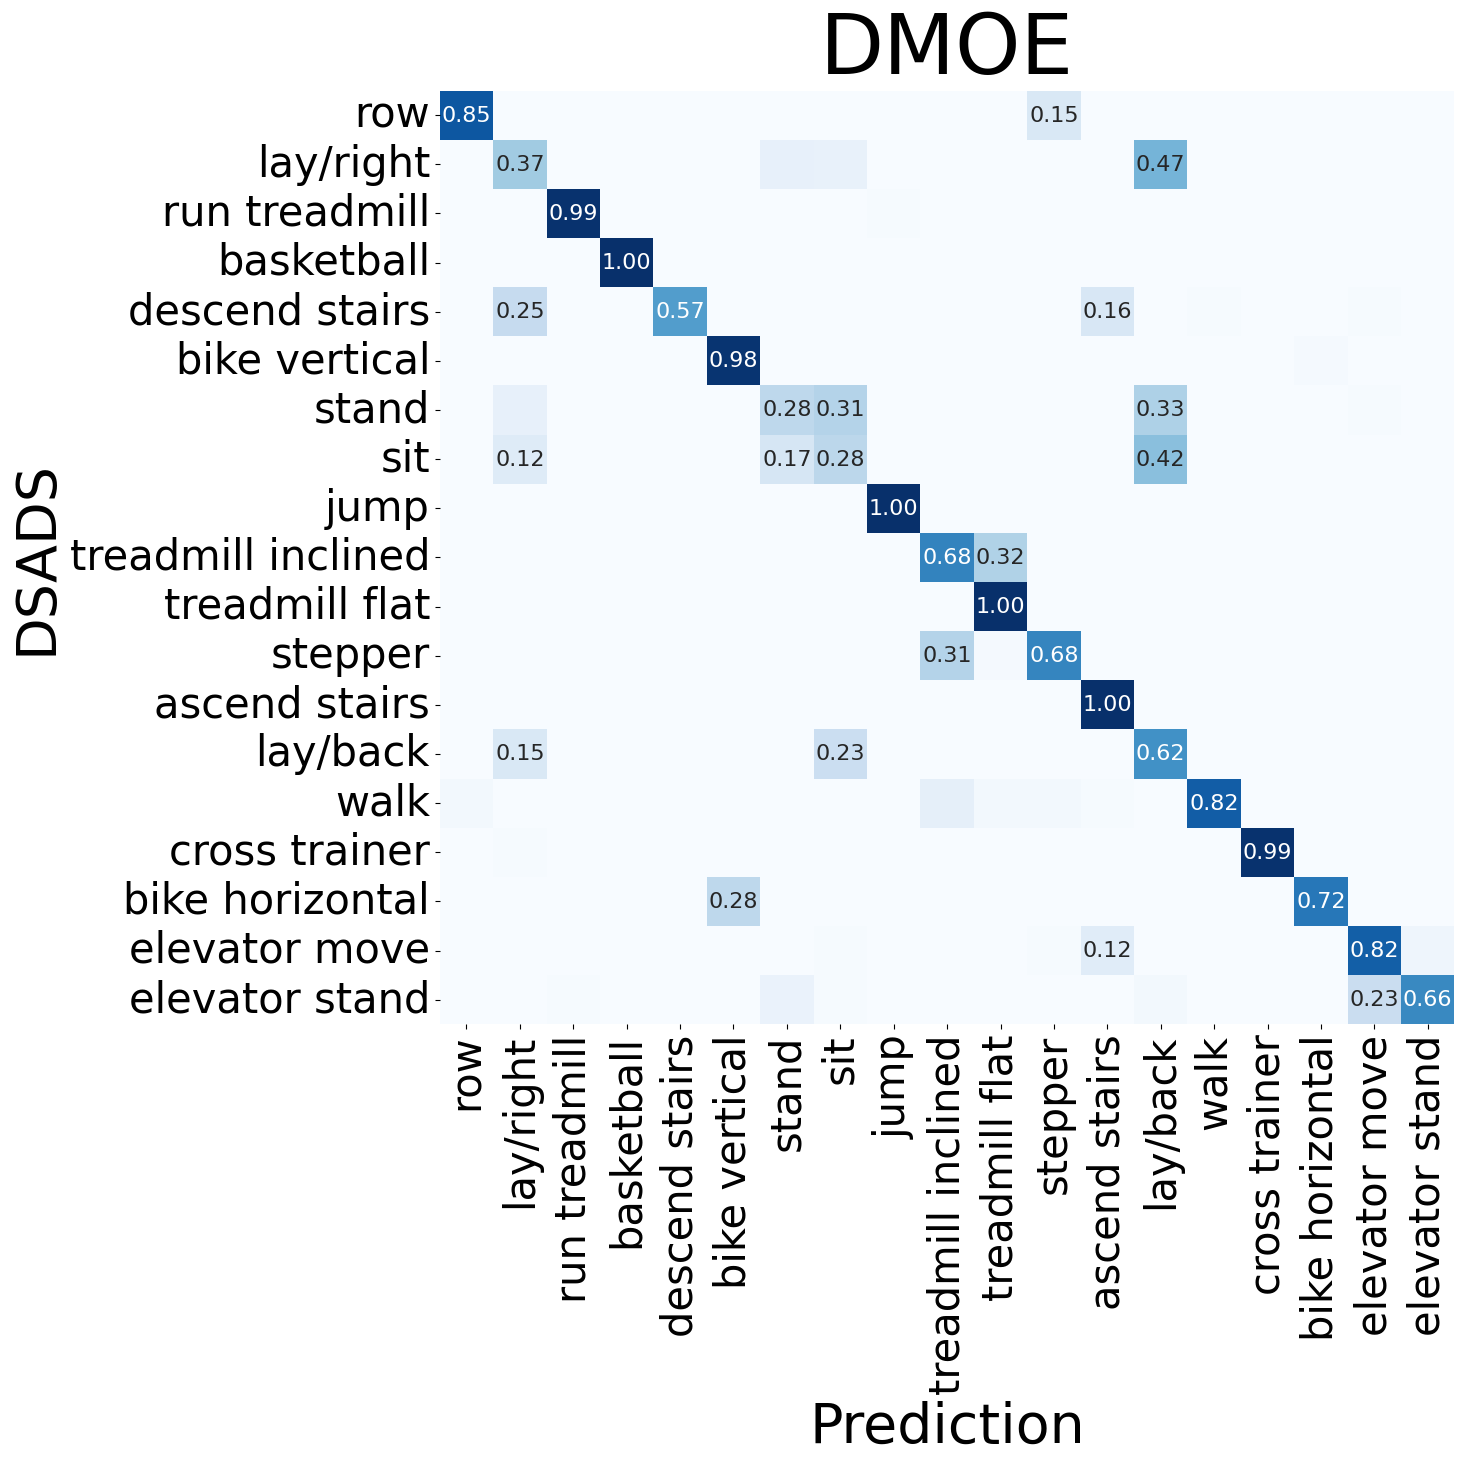

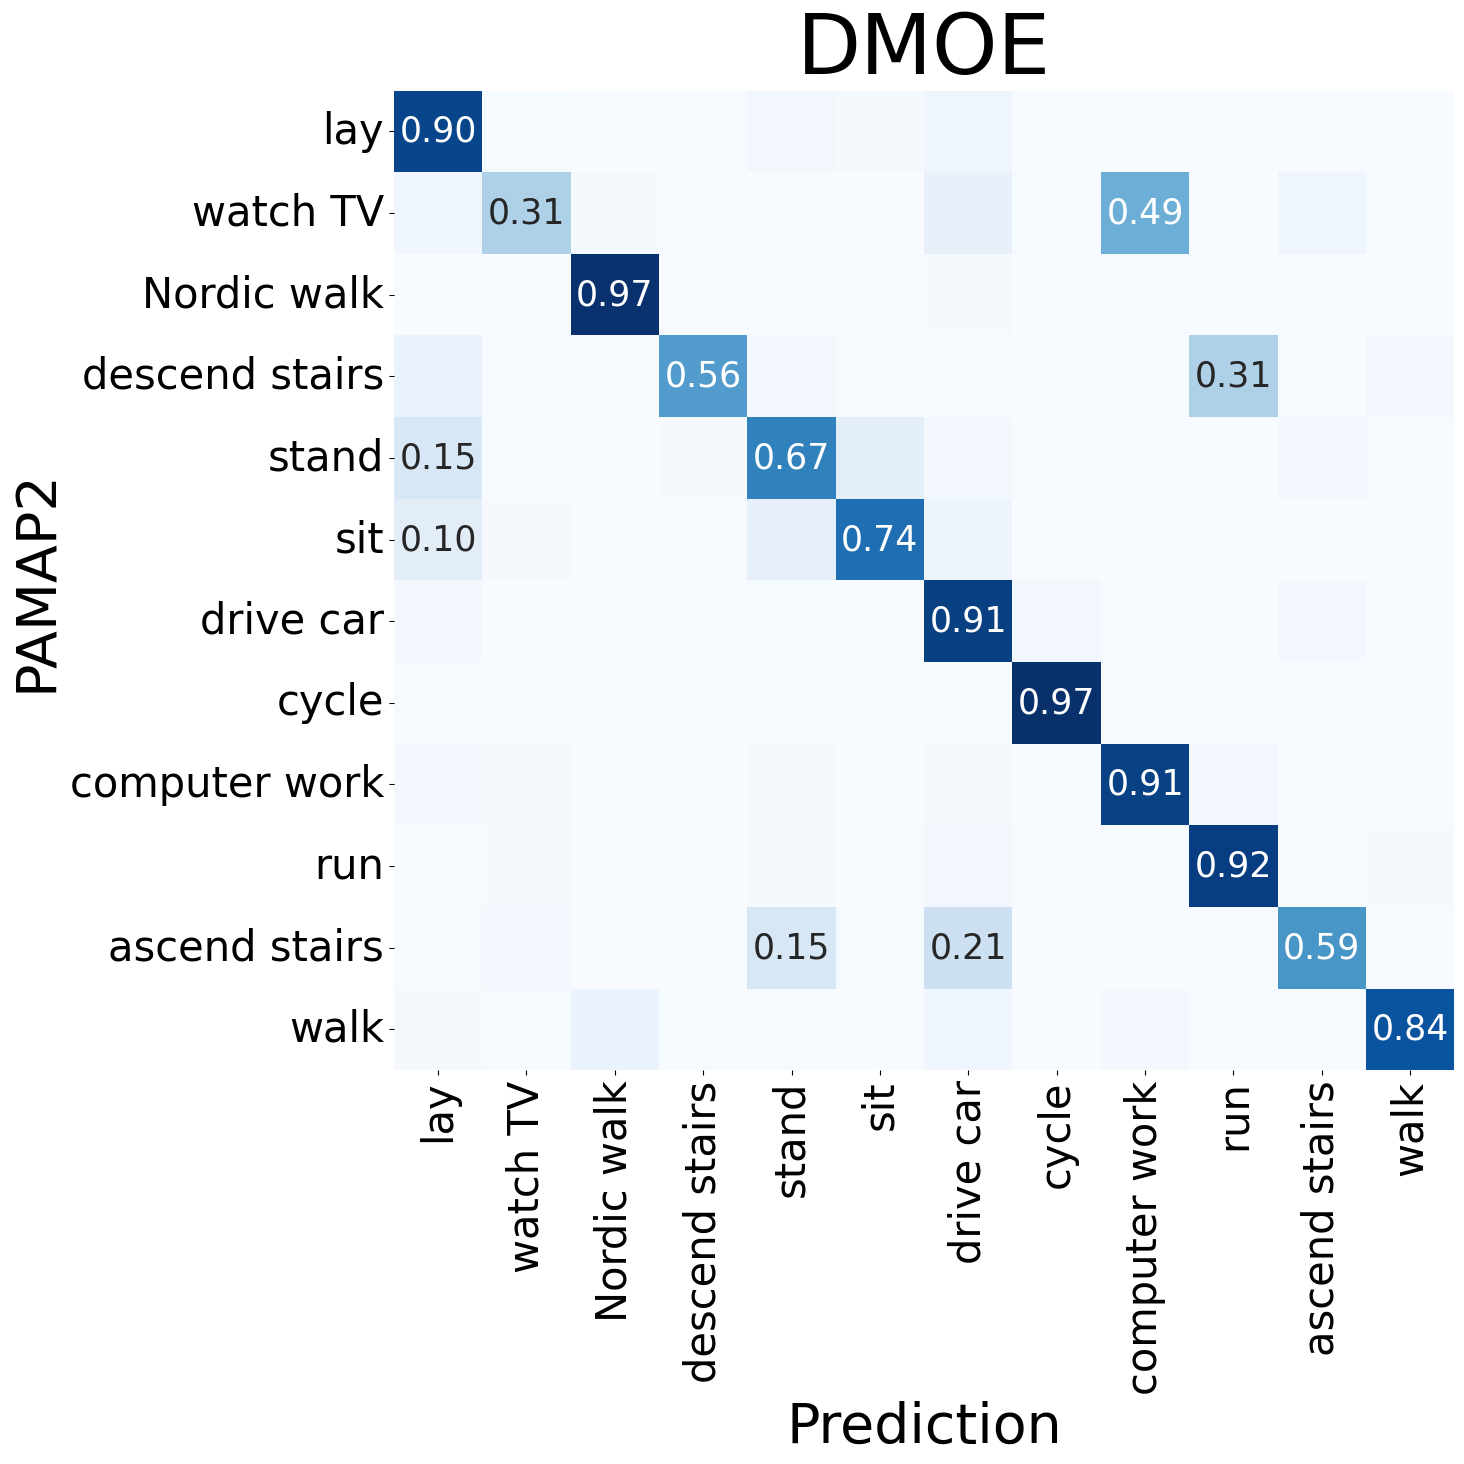

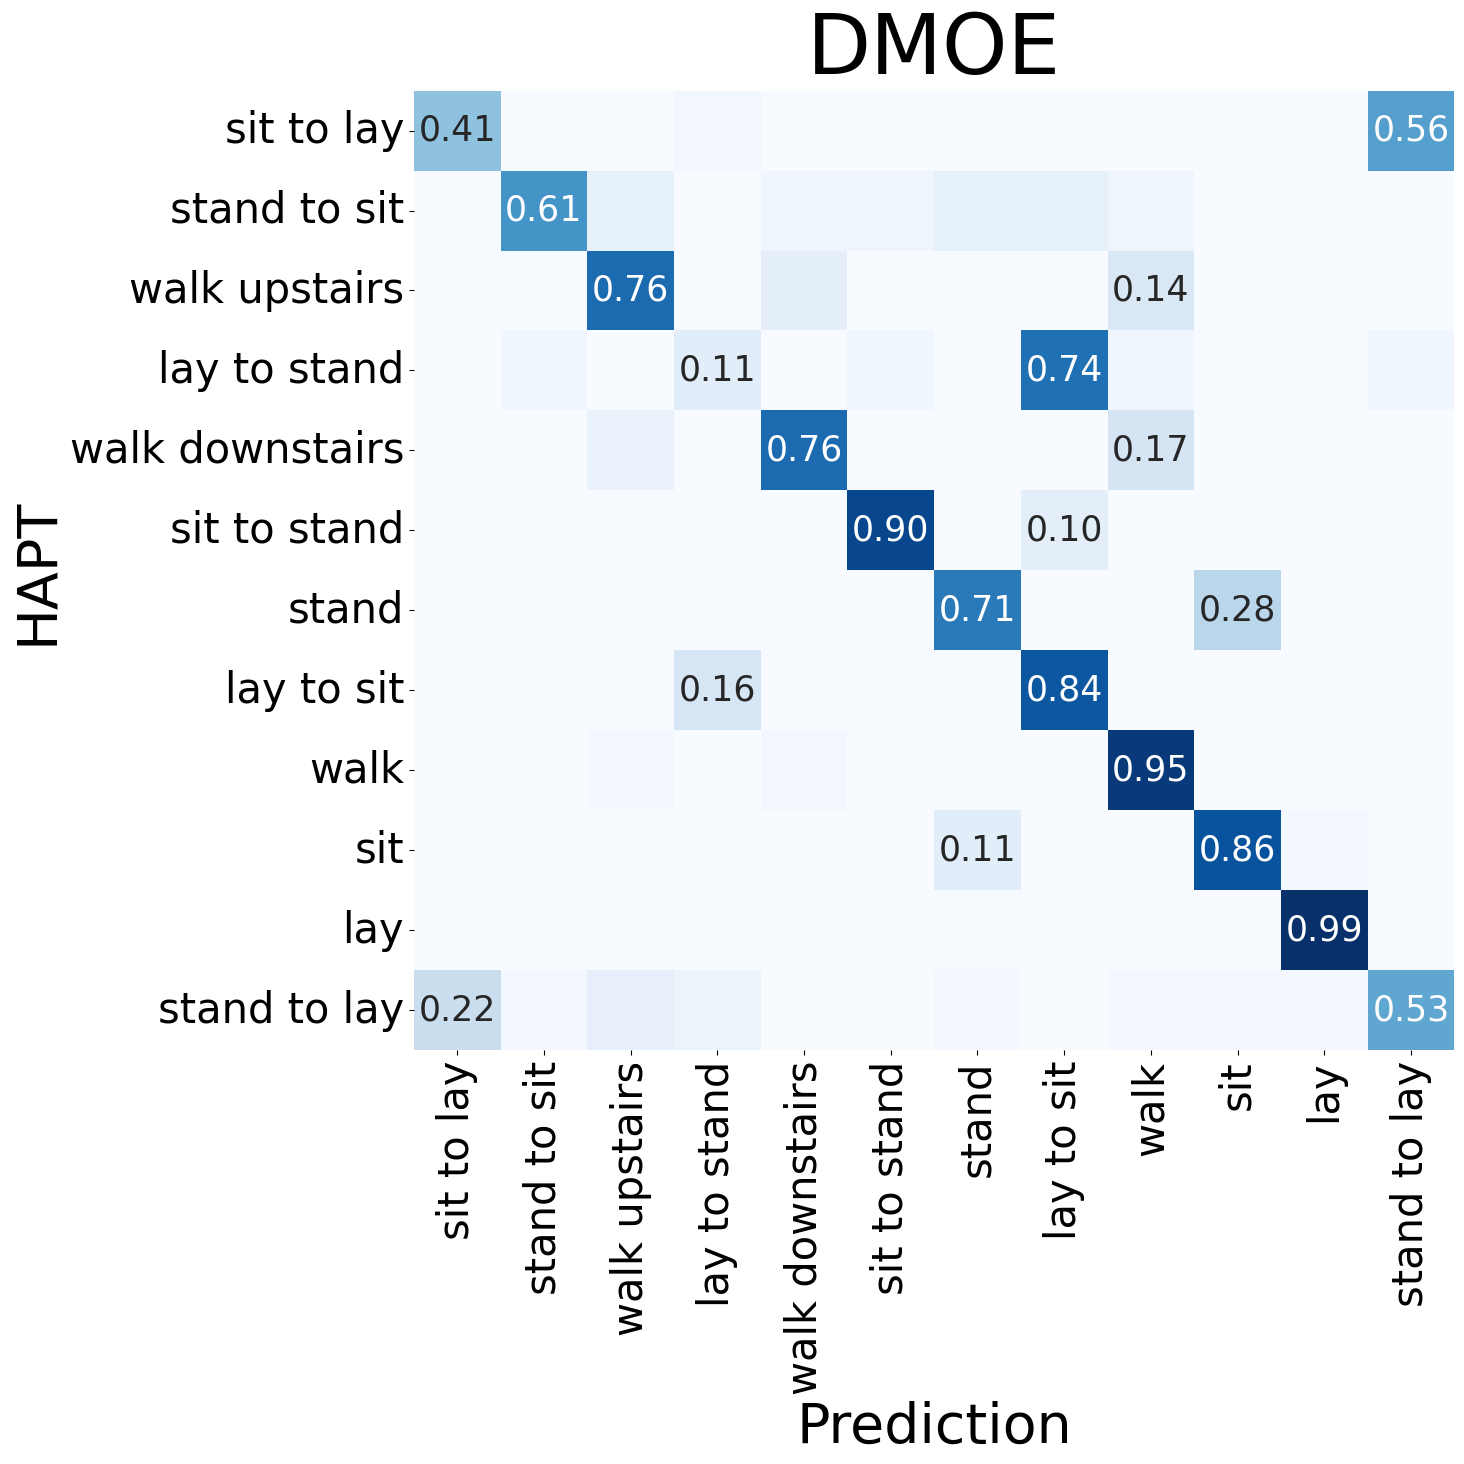

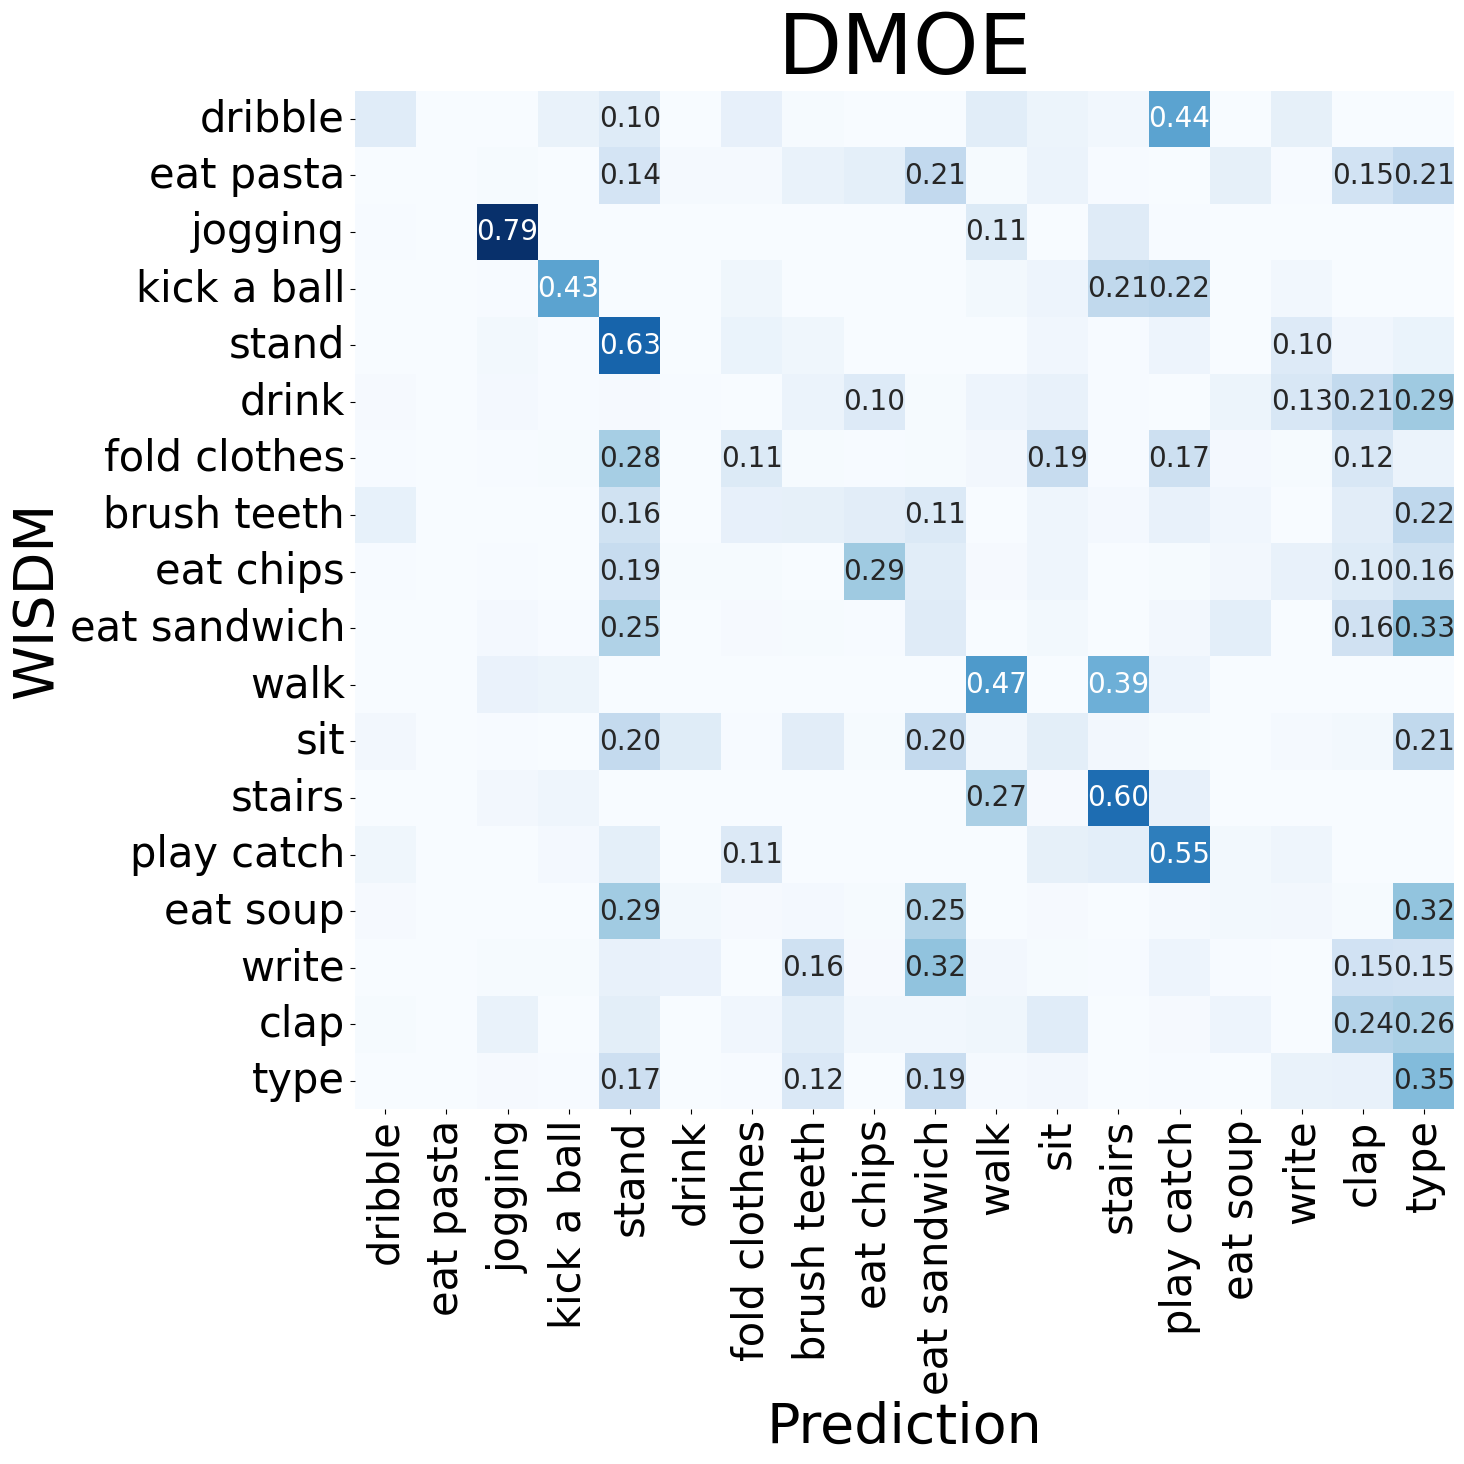

In [133]:
# fig, axs = plt.subplots(1, len(data[0]), figsize=(20 * len(data[0]), 20 * len(data[0])))
# for i, data_ in enumerate(data):
for j, dat_ in enumerate(data[0]):        
    fig, axs = plt.subplots(1, 1, figsize=(15, 15))
    cmn = dat_['cm'].astype('float') / dat_['cm'].sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cmn)
    annot_df = df_cm.applymap(lambda x: format_output(x))

    if j == 0:
        sns.heatmap(cmn, annot=annot_df, cmap='Blues', ax=axs, annot_kws={"fontsize":16}, fmt='', cbar=False)
    elif j == 1 or j == 2:
        sns.heatmap(cmn, annot=annot_df, cmap='Blues', ax=axs, annot_kws={"fontsize":25}, fmt='', cbar=False)
    elif j == 3:
        sns.heatmap(cmn, annot=annot_df, cmap='Blues', ax=axs, annot_kws={"fontsize":20}, fmt='', cbar=False)

    # if j == 0:
    # axs.set_ylabel(f'{dat_["name"]}\nTrue Class', fontsize=30)
    axs.set_ylabel(f'{dat_["name"]}', fontsize=40)
    # else:
    #     axs.set_ylabel(f'True Class', fontsize=15)
    
    axs.set_title(dat_["model"], fontsize=60)
    axs.set_xlabel('Prediction', fontsize=40)            

    # if j == 0:
    #     axs.set_xticklabels(y_labs[j], fontsize=30, rotation=90, ha='center')
    #     axs.set_yticklabels(y_labs[j], fontsize=30, rotation=0, ha='right')    
    # else:
    axs.set_xticklabels(y_labs[j], fontsize=30, rotation=90, ha='center')
    axs.set_yticklabels(y_labs[j], fontsize=30, rotation=0, ha='right')            
    
    plt.tight_layout(pad=2.0)
    # plt.show()
    fig.savefig(f'confusion_matrix_expert_{dat_["name"]}.pdf');

# Gdumb

In [134]:
dsads_gdumb = pickle.load(open('gdumb_dsads_3.pkl', 'rb'))
pamap_gdumb = pickle.load(open('gdumb_pamap_1.pkl', 'rb'))
hapt_gdumb = pickle.load(open('gdumb_hapt_3.pkl', 'rb'))
wisdm_gdumb = pickle.load(open('gdumb_wisdm_3.pkl', 'rb'))

cf = []

In [135]:
# DSADS
reverse_dsads_map = {k:v for k, v in enumerate(dsads_gdumb['clsorder'])}
expert_dsads_map = {v: k for k, v in enumerate(dsads_dct['data']['clsorder'])}

y_true = np.vectorize(reverse_dsads_map.get)(dsads_gdumb['test_confusion_matrix']['true'])
y_true = np.vectorize(expert_dsads_map.get)(y_true)

y_preds = np.vectorize(reverse_dsads_map.get)(dsads_gdumb['test_confusion_matrix']['preds'])
y_preds = np.vectorize(expert_dsads_map.get)(y_preds)

cf.append(confusion_matrix(y_true, y_preds))

# PAMAP
reverse_pamap_map = {k:v for k, v in enumerate(pamap_gdumb['clsorder'])}
expert_pamap_map = {v: k for k, v in enumerate(pamap_dct['data']['clsorder'])}

y_true = np.vectorize(reverse_pamap_map.get)(pamap_gdumb['test_confusion_matrix']['true'])
y_true = np.vectorize(expert_pamap_map.get)(y_true)

y_preds = np.vectorize(reverse_pamap_map.get)(pamap_gdumb['test_confusion_matrix']['preds'])
y_preds = np.vectorize(expert_pamap_map.get)(y_preds)

cf.append(confusion_matrix(y_true, y_preds))

# HAPT
reverse_hapt_map = {k:v for k, v in enumerate(hapt_gdumb['clsorder'])}
expert_hapt_map = {v: k for k, v in enumerate(hapt_dct['data']['clsorder'])}

y_true = np.vectorize(reverse_hapt_map.get)(hapt_gdumb['test_confusion_matrix']['true'])
y_true = np.vectorize(expert_hapt_map.get)(y_true)

y_preds = np.vectorize(reverse_hapt_map.get)(hapt_gdumb['test_confusion_matrix']['preds'])
y_preds = np.vectorize(expert_hapt_map.get)(y_preds)

cf.append(confusion_matrix(y_true, y_preds))

# WISDM
reverse_wisdm_map = {k:v for k, v in enumerate(wisdm_gdumb['clsorder'])}
expert_wisdm_map = {v: k for k, v in enumerate(wisdm_dct['data']['clsorder'])}

y_true = np.vectorize(reverse_wisdm_map.get)(wisdm_gdumb['test_confusion_matrix']['true'])
y_true = np.vectorize(expert_wisdm_map.get)(y_true)

y_preds = np.vectorize(reverse_wisdm_map.get)(wisdm_gdumb['test_confusion_matrix']['preds'])
y_preds = np.vectorize(expert_wisdm_map.get)(y_preds)

cf.append(confusion_matrix(y_true, y_preds))

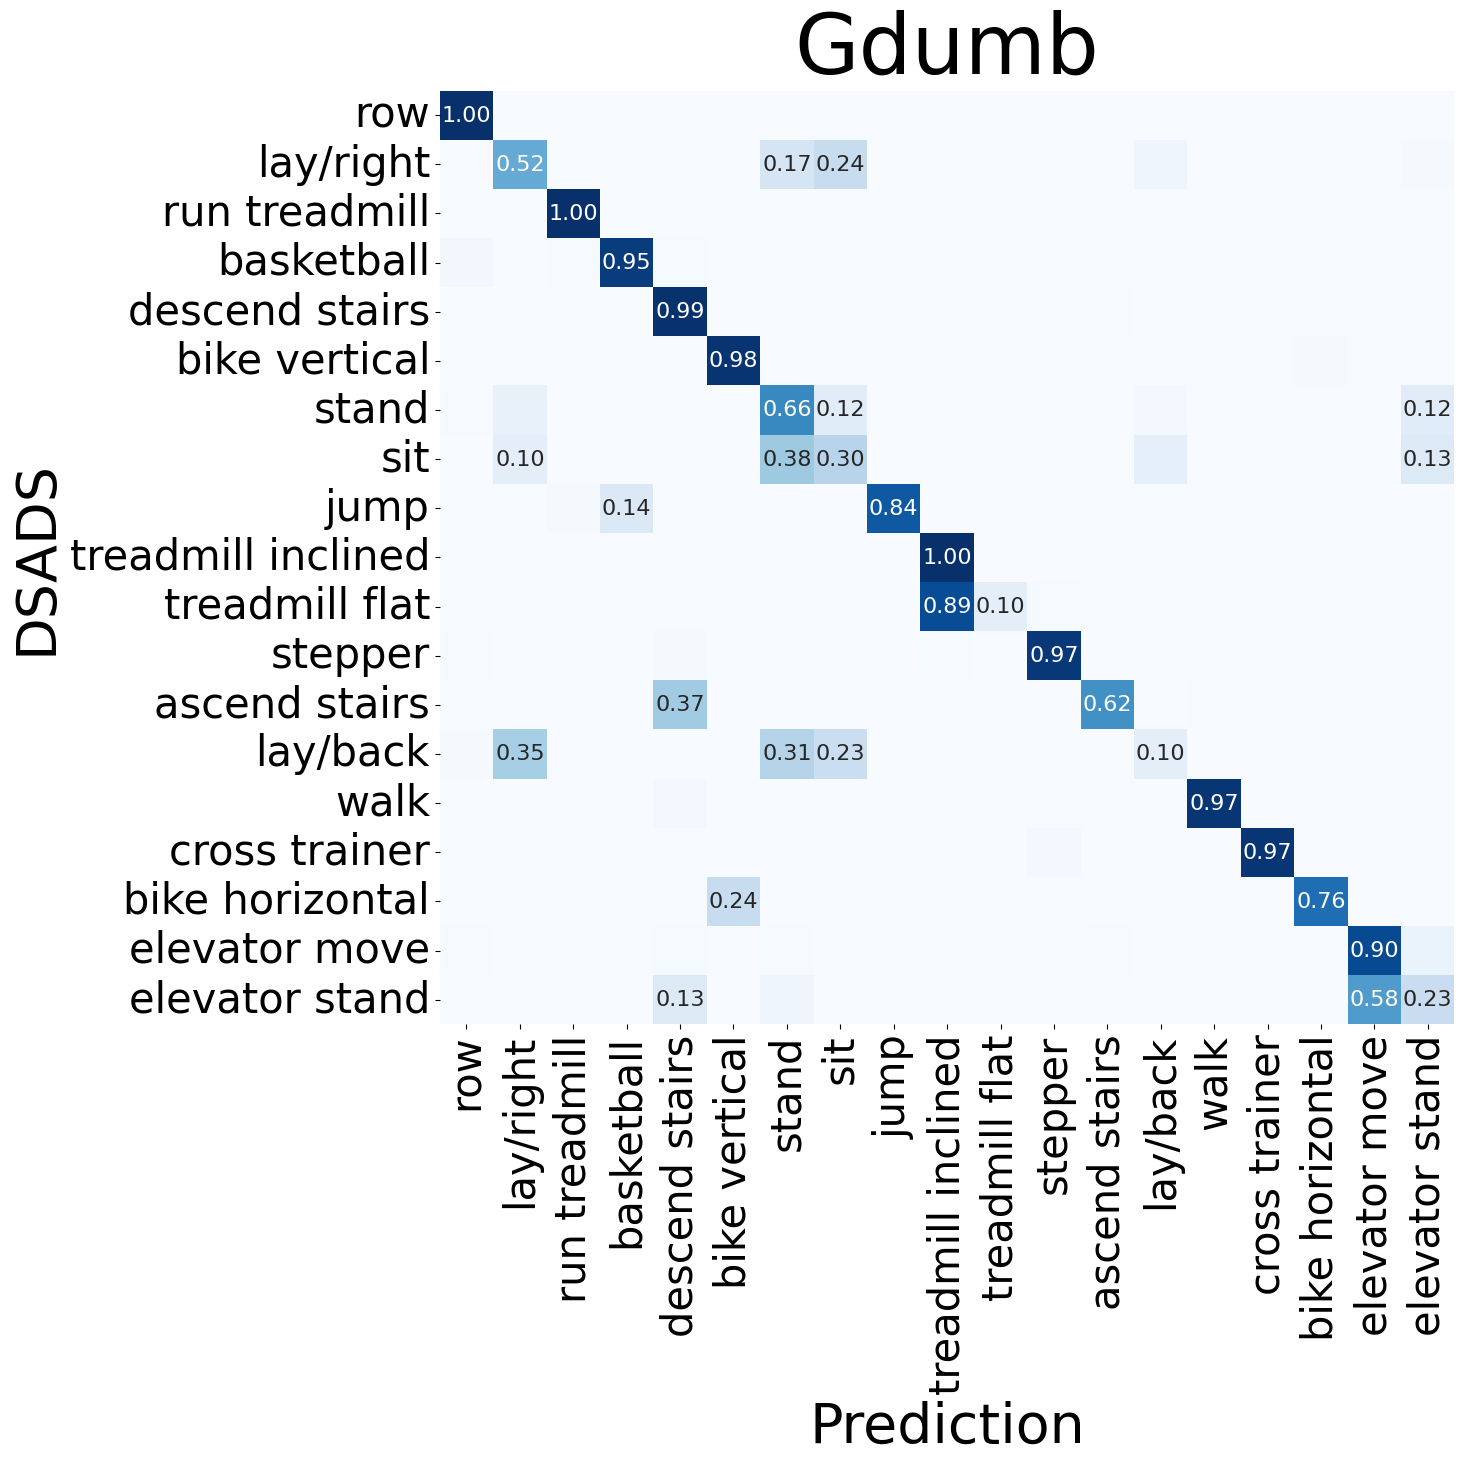

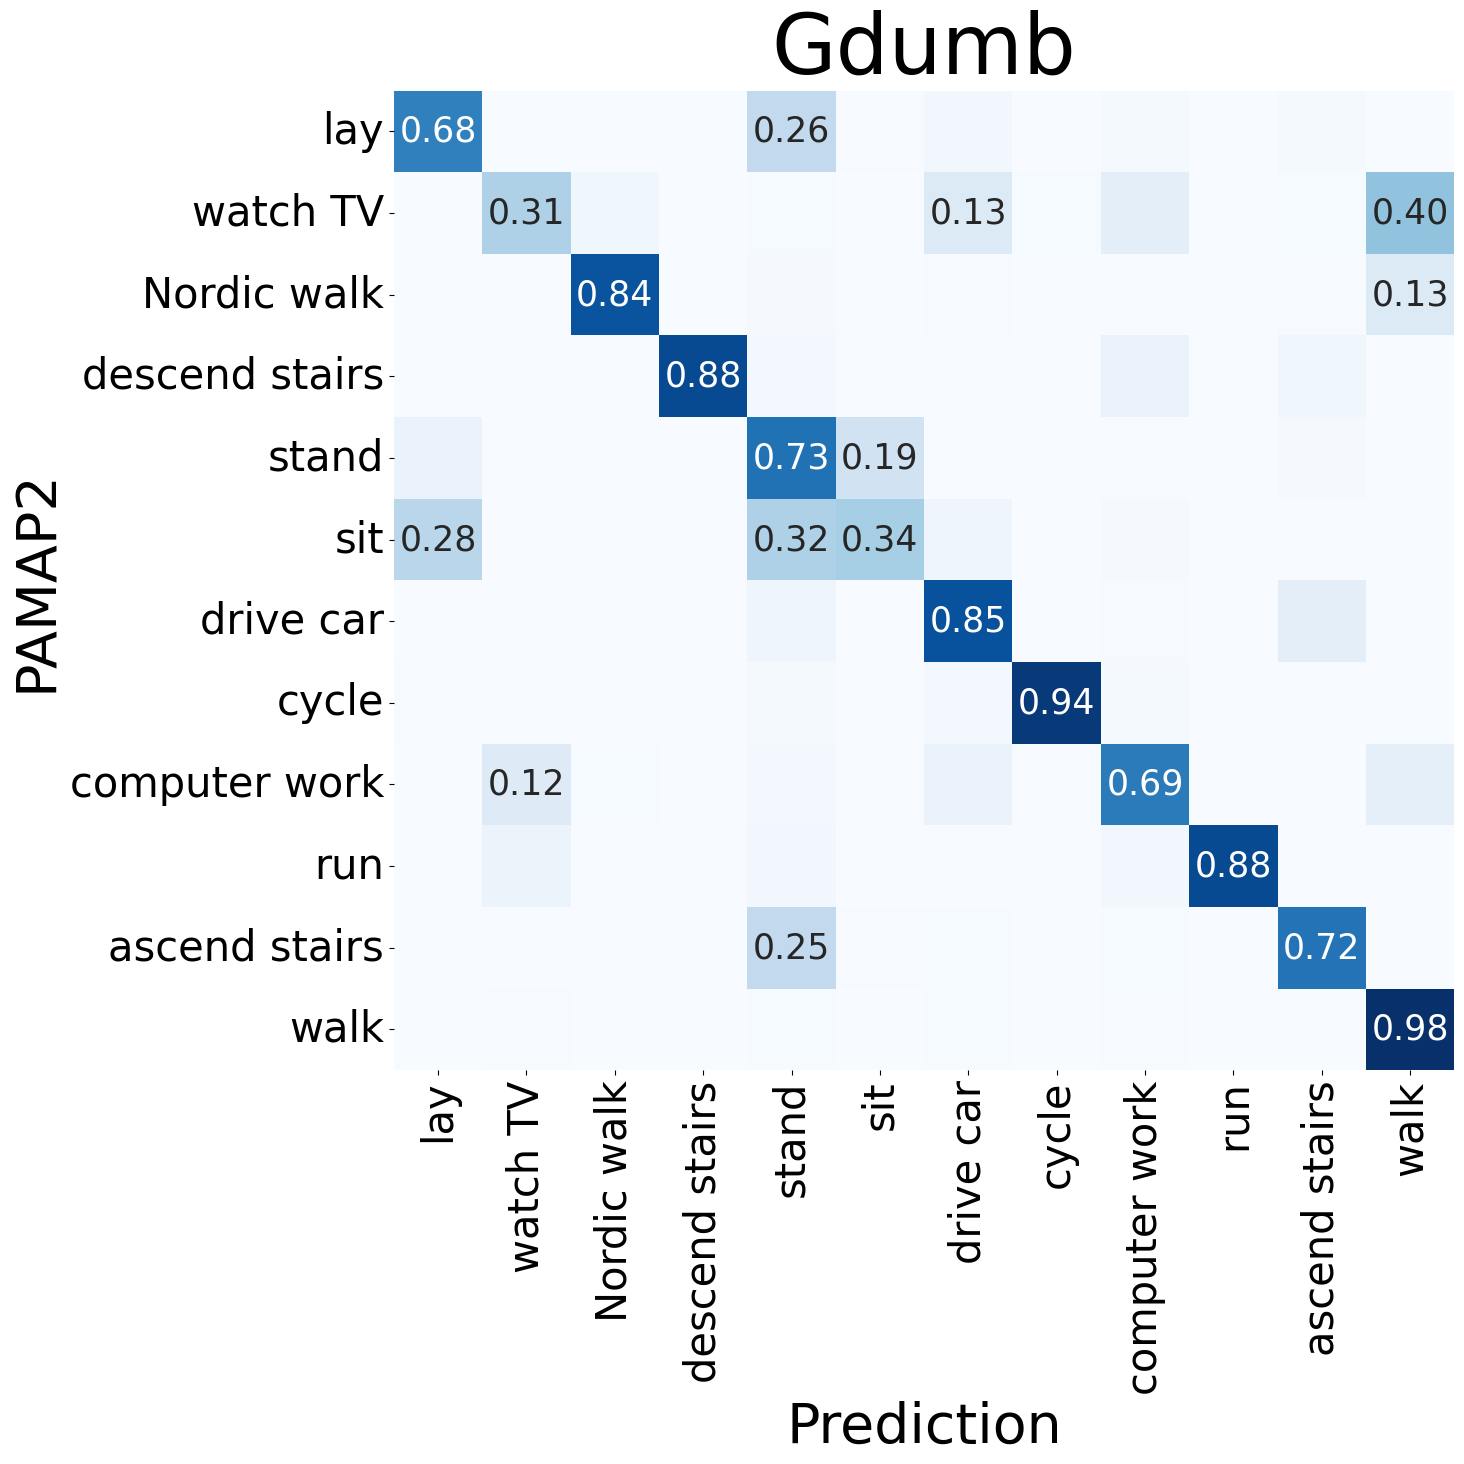

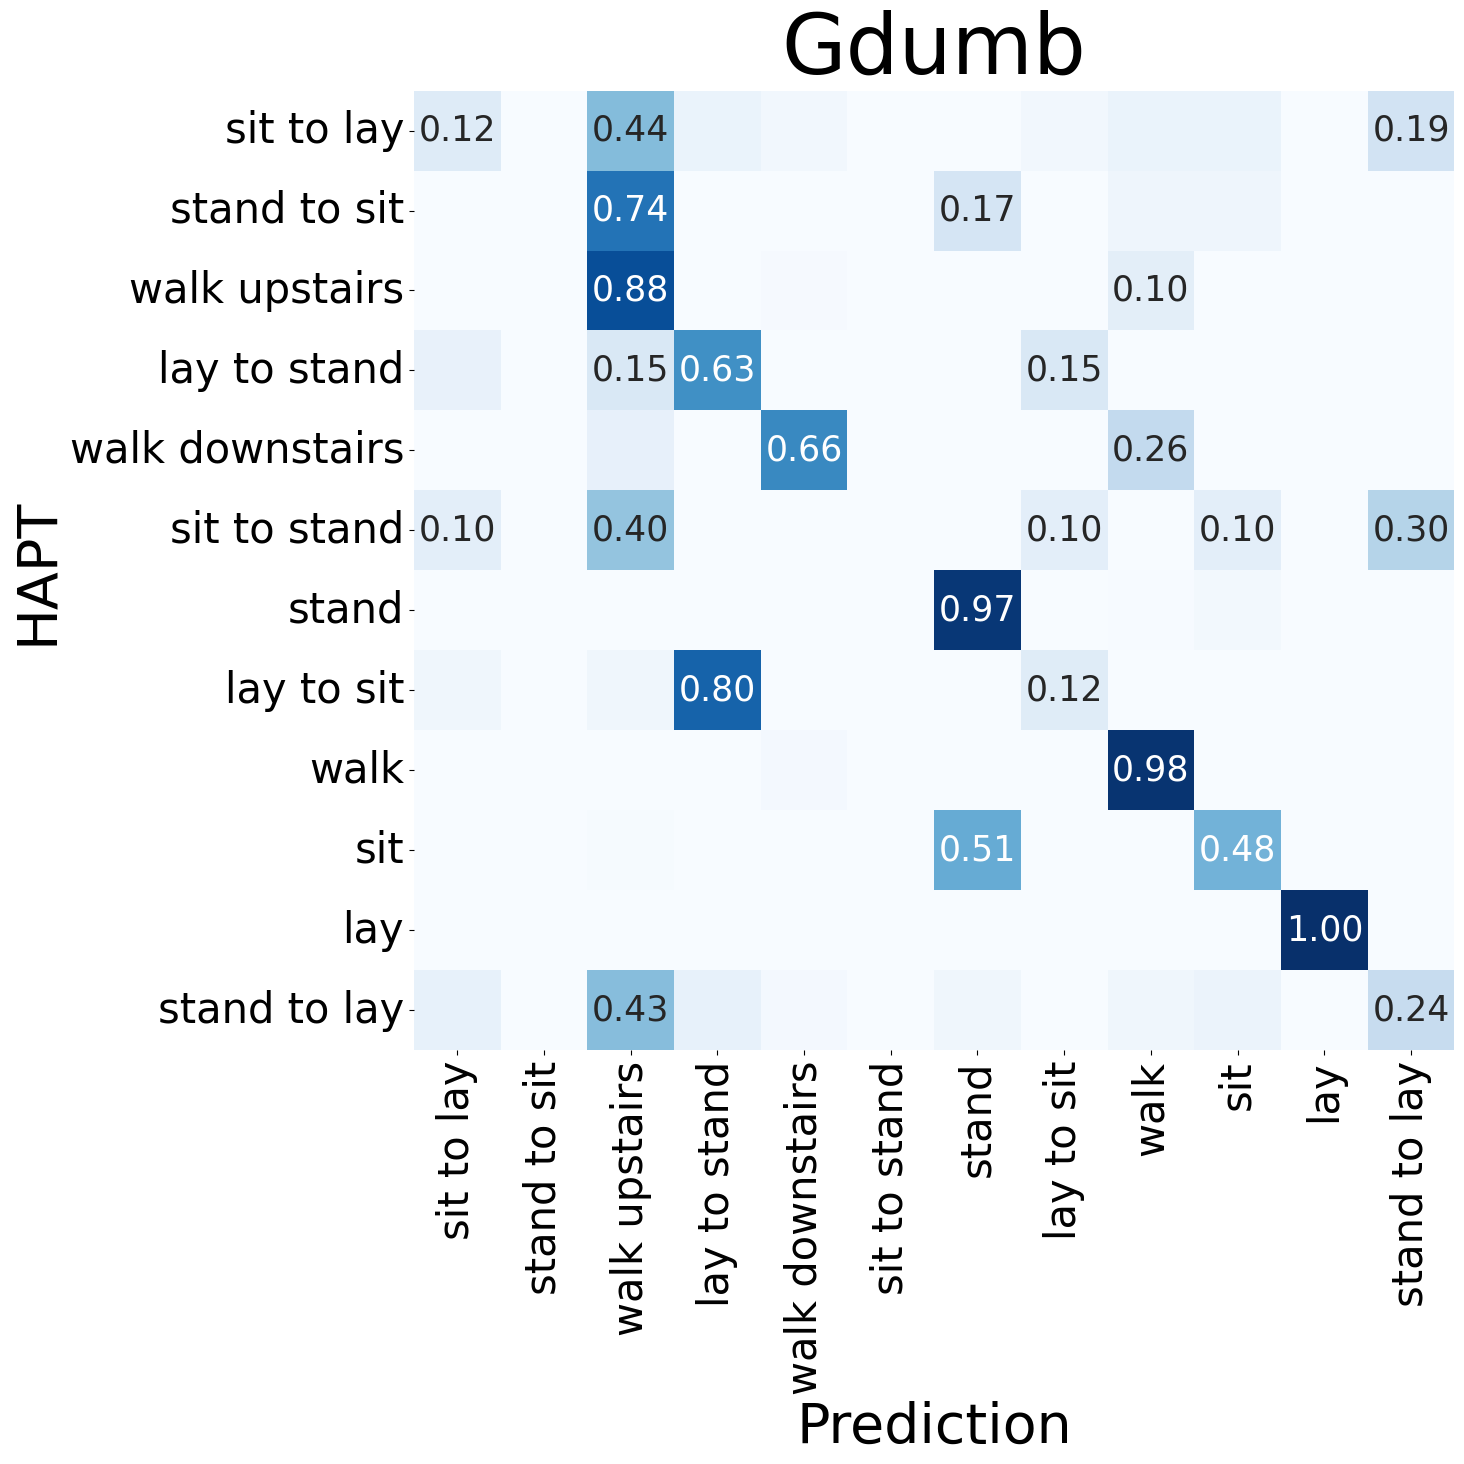

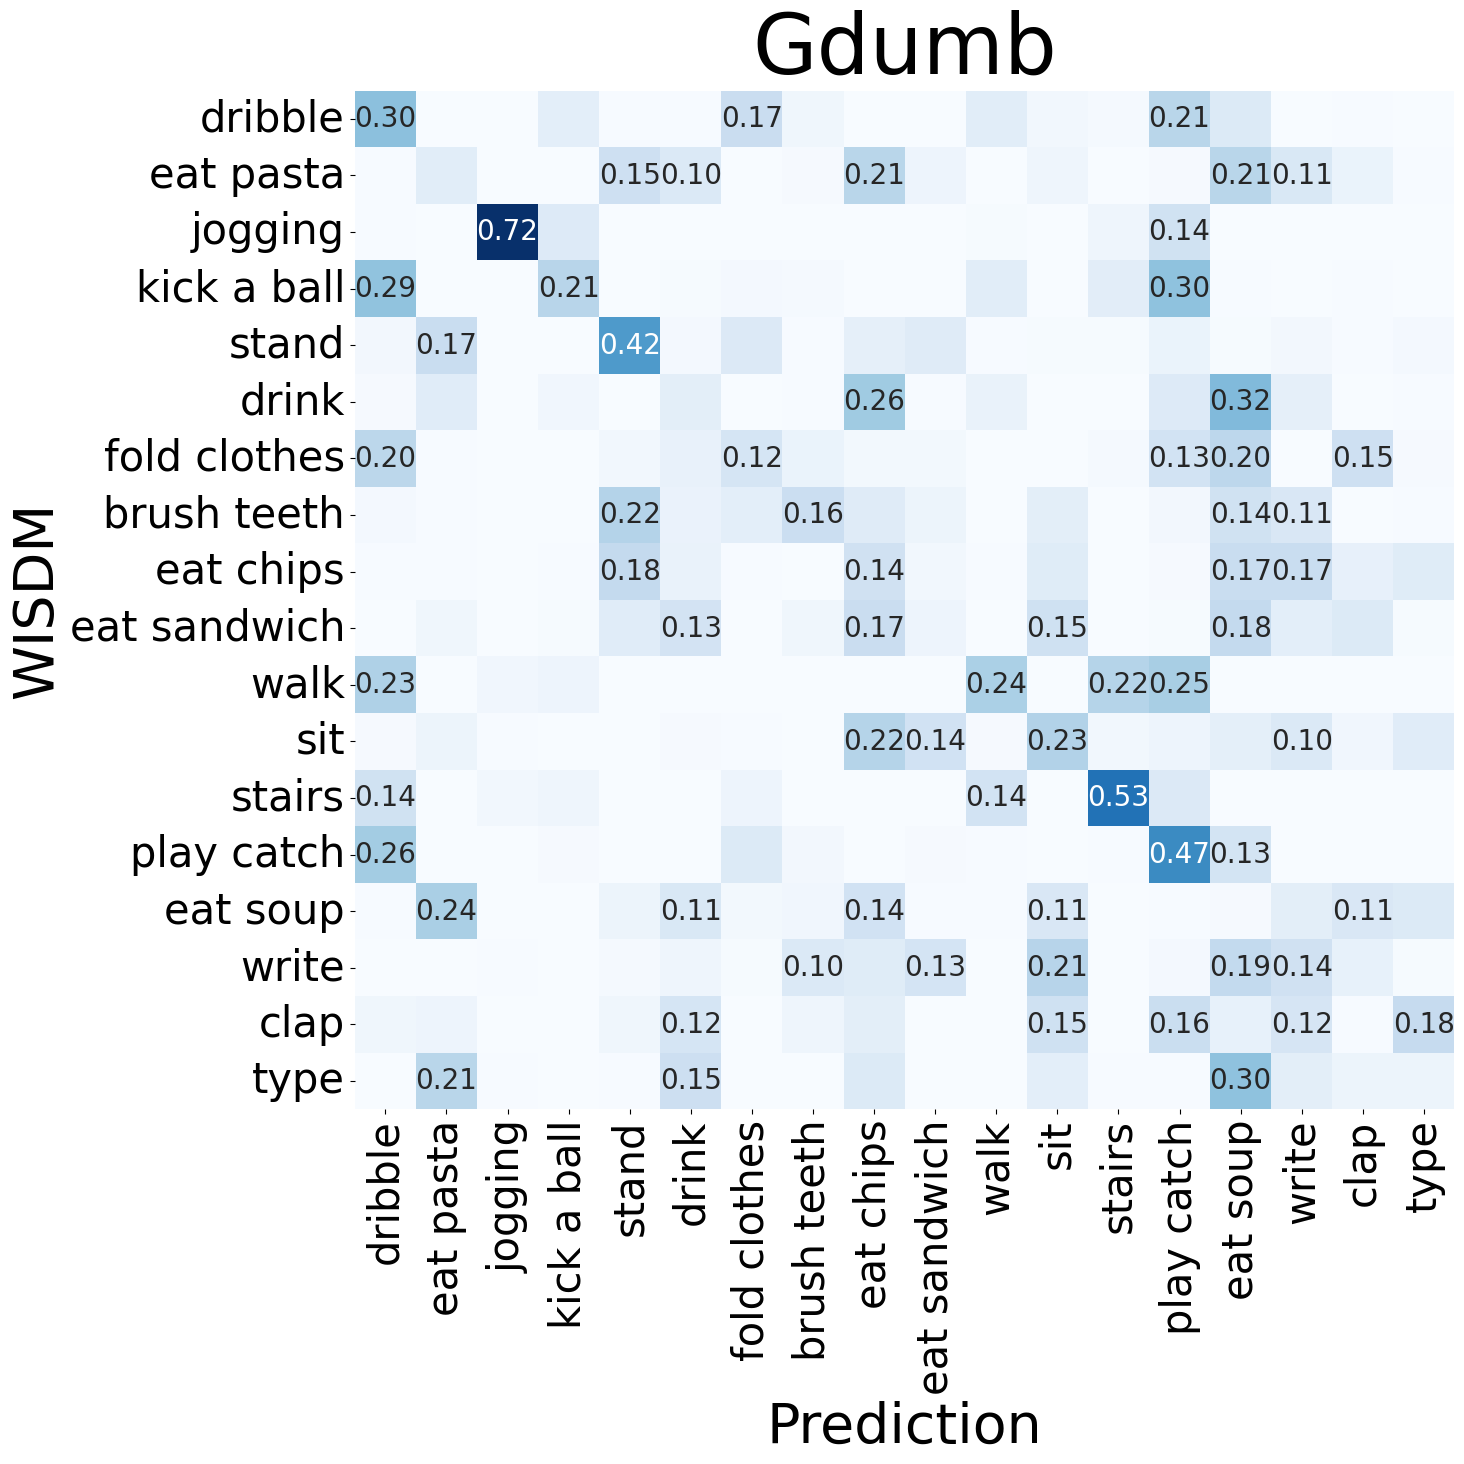

In [136]:
data = [
    [{'name': 'DSADS', 'cm': cf[0], 'model': 'Gdumb'},
    {'name': 'PAMAP2', 'cm': cf[1], 'model': 'Gdumb'},
    {'name': 'HAPT', 'cm': cf[2], 'model': 'Gdumb'},
    {'name': 'WISDM', 'cm': cf[3], 'model': 'Gdumb'},],
]


for j, dat_ in enumerate(data[0]):        
    fig, axs = plt.subplots(1, 1, figsize=(15, 15))
    cmn = dat_['cm'].astype('float') / dat_['cm'].sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cmn)
    annot_df = df_cm.applymap(lambda x: format_output(x))

    if j == 0:
        sns.heatmap(cmn, annot=annot_df, cmap='Blues', ax=axs, annot_kws={"fontsize":16}, fmt='', cbar=False)
    elif j == 1 or j == 2:
        sns.heatmap(cmn, annot=annot_df, cmap='Blues', ax=axs, annot_kws={"fontsize":25}, fmt='', cbar=False)
    elif j == 3:
        sns.heatmap(cmn, annot=annot_df, cmap='Blues', ax=axs, annot_kws={"fontsize":20}, fmt='', cbar=False)

    # if j == 0:
    # axs.set_ylabel(f'{dat_["name"]}\nTrue Class', fontsize=30)
    axs.set_ylabel(f'{dat_["name"]}', fontsize=40)
    # else:
    #     axs.set_ylabel(f'True Class', fontsize=15)
    
    axs.set_title(dat_["model"], fontsize=60)
    axs.set_xlabel('Prediction', fontsize=40)            

    # if j == 0:
    #     axs.set_xticklabels(y_labs[j], fontsize=30, rotation=90, ha='center')
    #     axs.set_yticklabels(y_labs[j], fontsize=30, rotation=0, ha='right')    
    # else:
    axs.set_xticklabels(y_labs[j], fontsize=30, rotation=90, ha='center')
    axs.set_yticklabels(y_labs[j], fontsize=30, rotation=0, ha='right')            
    
    plt.tight_layout(pad=2.0)
    # plt.show()
    fig.savefig(f'confusion_matrix_gdumb_{dat_["name"]}.pdf');


# DER

In [137]:
dsads_der = pickle.load(open('der_dsads_4.pkl', 'rb'))
pamap_der = pickle.load(open('der_pamap_4.pkl', 'rb'))
hapt_der = pickle.load(open('der_hapt_5.pkl', 'rb'))
wisdm_der = pickle.load(open('der_wisdm_4.pkl', 'rb'))

cf = []

In [138]:
# DSADS
reverse_dsads_map = {k:v for k, v in enumerate(dsads_der['clsorder'])}
expert_dsads_map = {v: k for k, v in enumerate(dsads_dct['data']['clsorder'])}

y_true = np.vectorize(reverse_dsads_map.get)(dsads_der['test_confusion_matrix']['true'])
y_true = np.vectorize(expert_dsads_map.get)(y_true)

y_preds = np.vectorize(reverse_dsads_map.get)(dsads_der['test_confusion_matrix']['preds'])
y_preds = np.vectorize(expert_dsads_map.get)(y_preds)

cf.append(confusion_matrix(y_true, y_preds))

# PAMAP
reverse_pamap_map = {k:v for k, v in enumerate(pamap_der['clsorder'])}
expert_pamap_map = {v: k for k, v in enumerate(pamap_dct['data']['clsorder'])}

y_true = np.vectorize(reverse_pamap_map.get)(pamap_der['test_confusion_matrix']['true'])
y_true = np.vectorize(expert_pamap_map.get)(y_true)

y_preds = np.vectorize(reverse_pamap_map.get)(pamap_der['test_confusion_matrix']['preds'])
y_preds = np.vectorize(expert_pamap_map.get)(y_preds)

cf.append(confusion_matrix(y_true, y_preds))

# HAPT
reverse_hapt_map = {k:v for k, v in enumerate(hapt_der['clsorder'])}
expert_hapt_map = {v: k for k, v in enumerate(hapt_dct['data']['clsorder'])}

y_true = np.vectorize(reverse_hapt_map.get)(hapt_der['test_confusion_matrix']['true'])
y_true = np.vectorize(expert_hapt_map.get)(y_true)

y_preds = np.vectorize(reverse_hapt_map.get)(hapt_der['test_confusion_matrix']['preds'])
y_preds = np.vectorize(expert_hapt_map.get)(y_preds)

cf.append(confusion_matrix(y_true, y_preds))

# WISDM
reverse_wisdm_map = {k:v for k, v in enumerate(wisdm_der['clsorder'])}
expert_wisdm_map = {v: k for k, v in enumerate(wisdm_dct['data']['clsorder'])}

y_true = np.vectorize(reverse_wisdm_map.get)(wisdm_der['test_confusion_matrix']['true'])
y_true = np.vectorize(expert_wisdm_map.get)(y_true)

y_preds = np.vectorize(reverse_wisdm_map.get)(wisdm_der['test_confusion_matrix']['preds'])
y_preds = np.vectorize(expert_wisdm_map.get)(y_preds)

cf.append(confusion_matrix(y_true, y_preds))

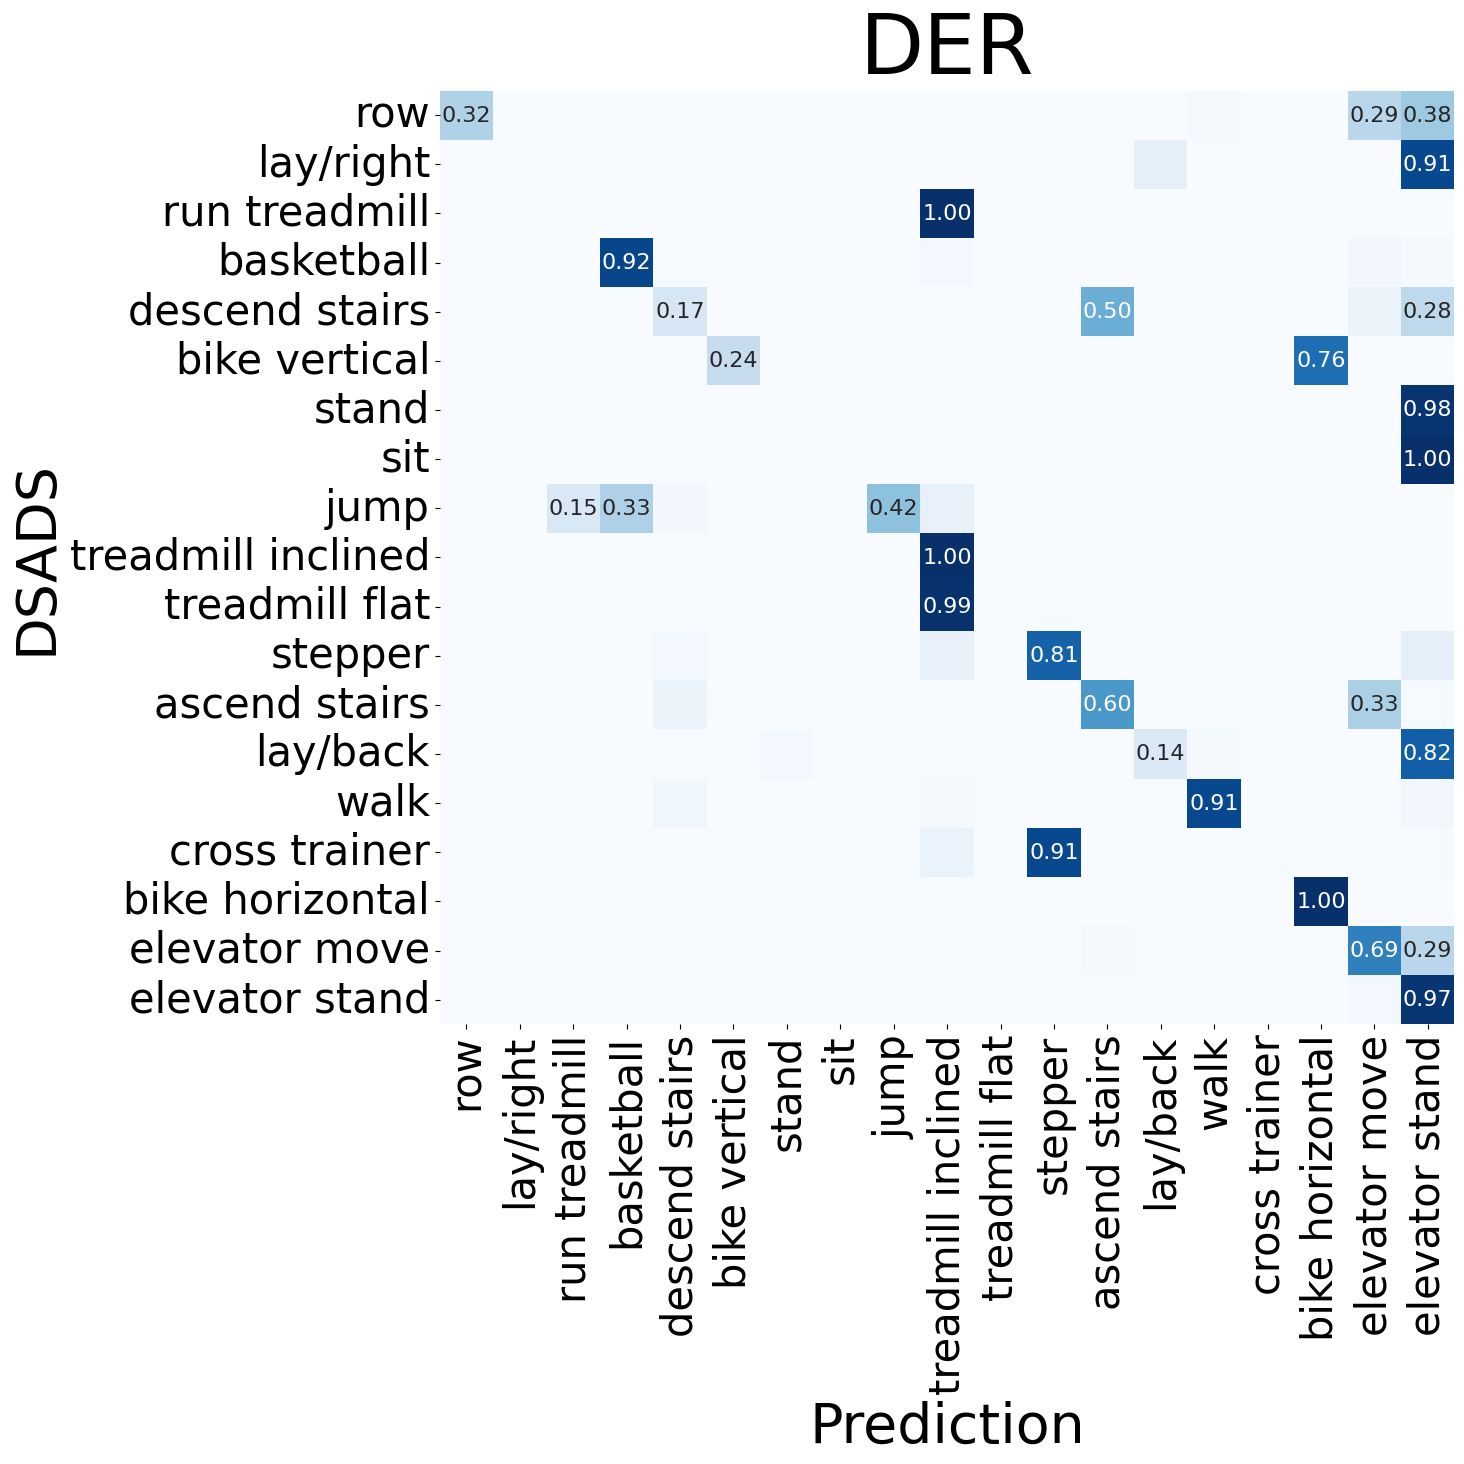

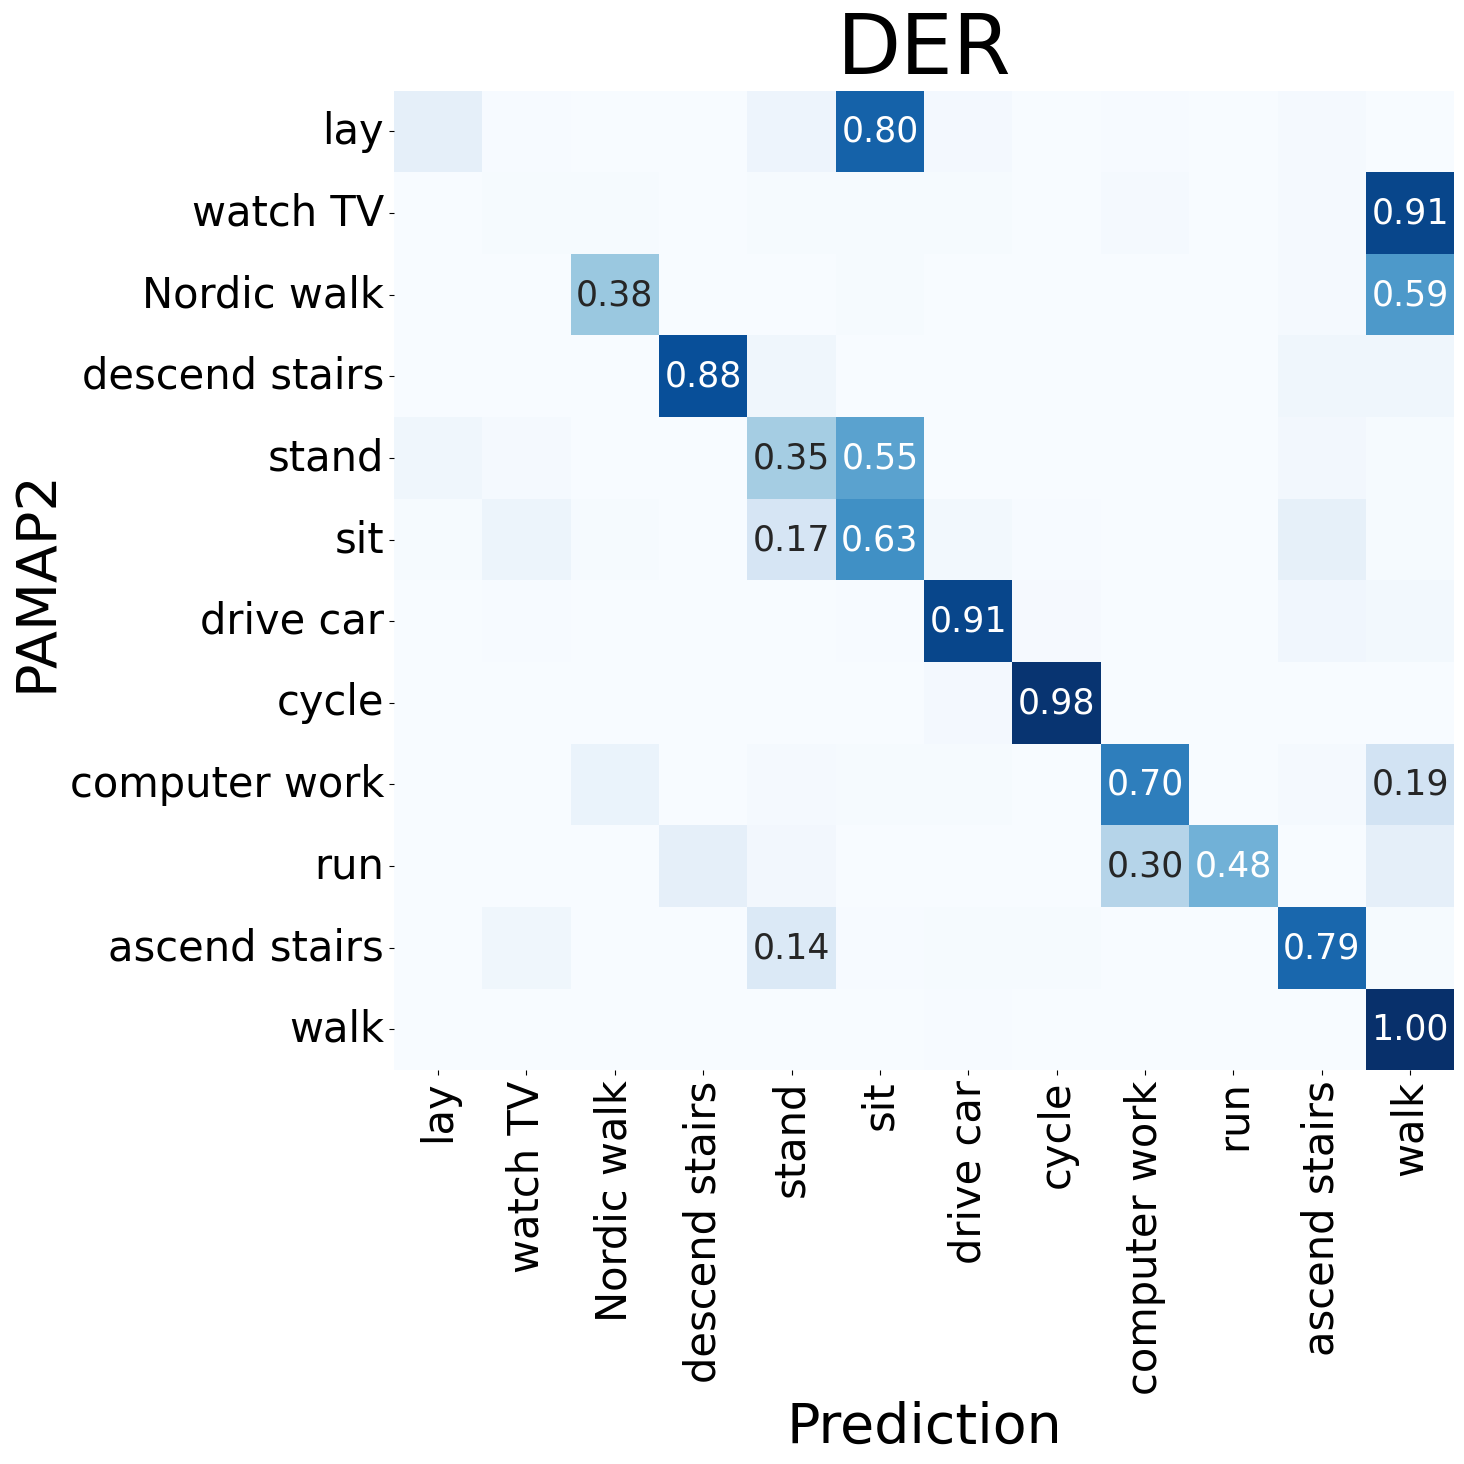

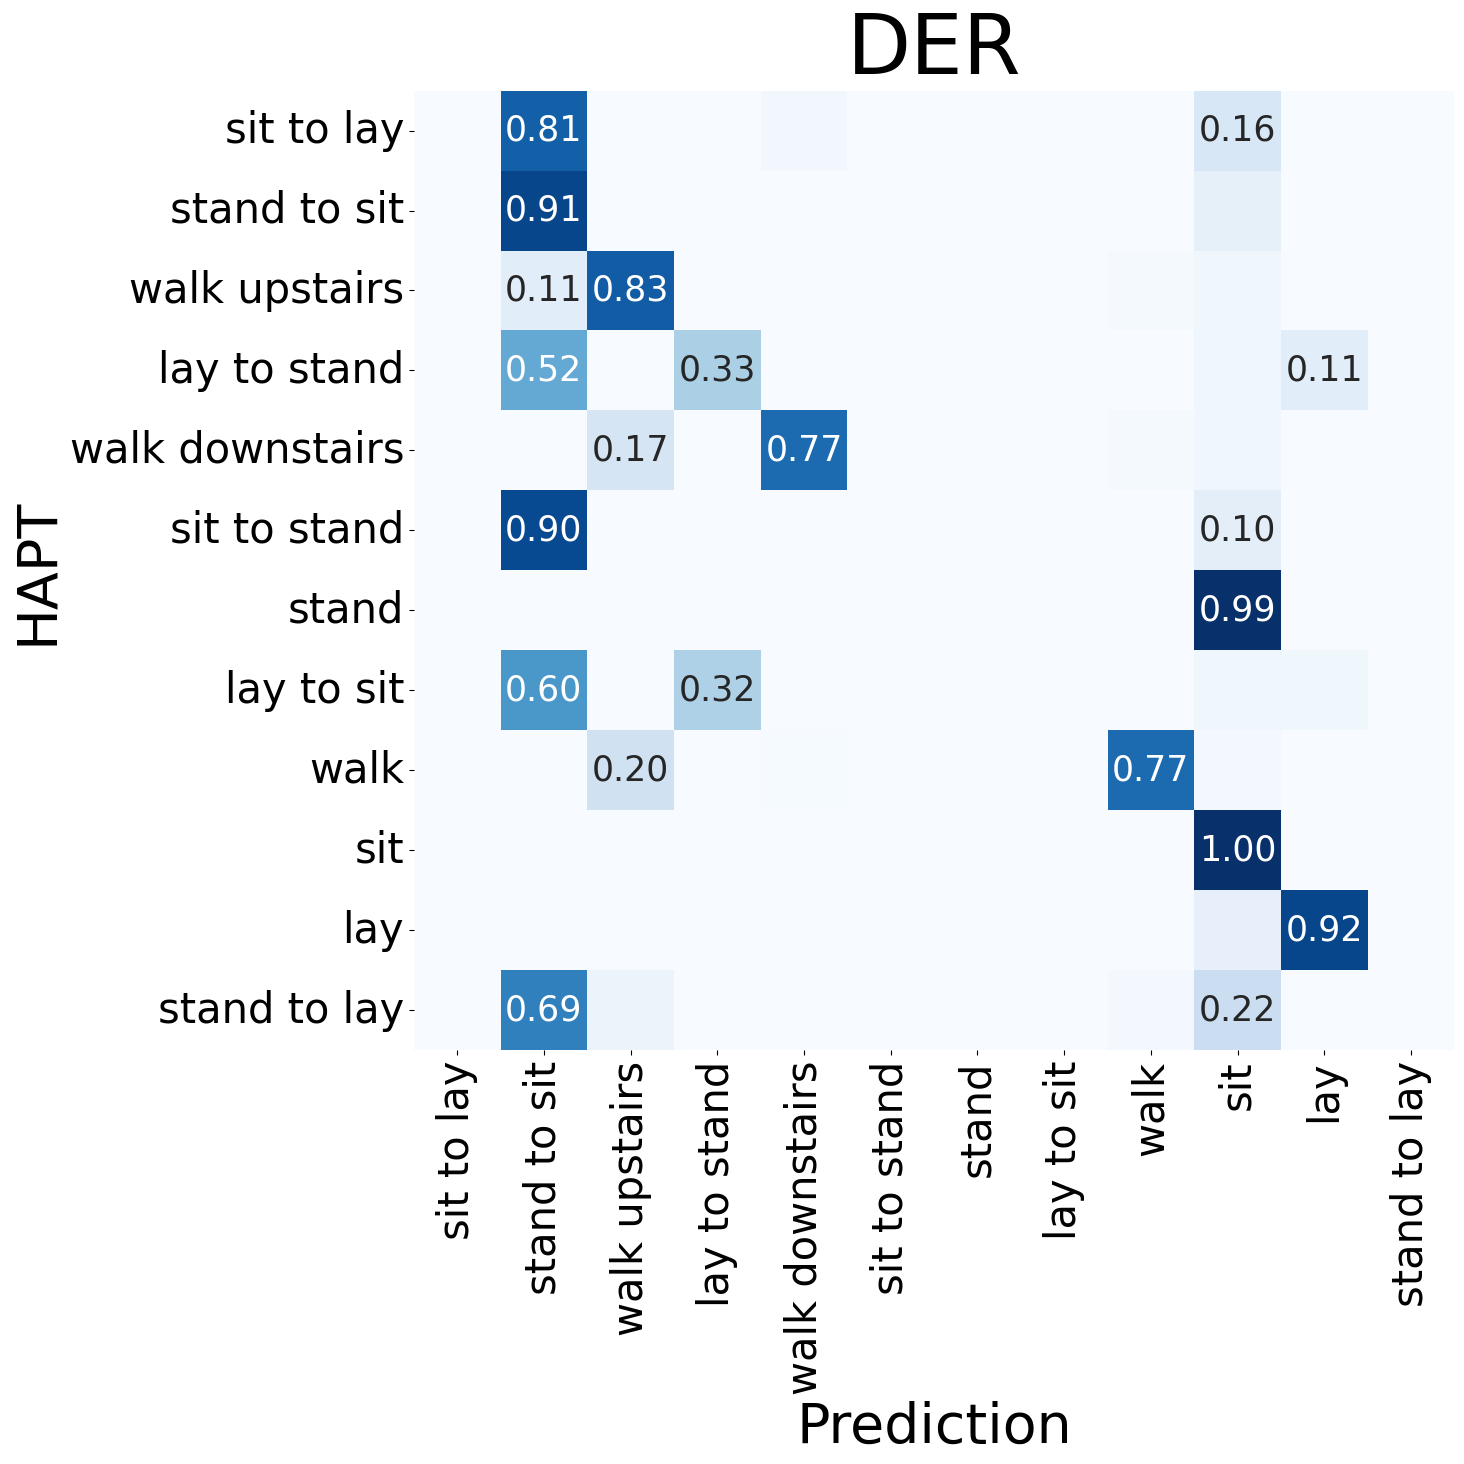

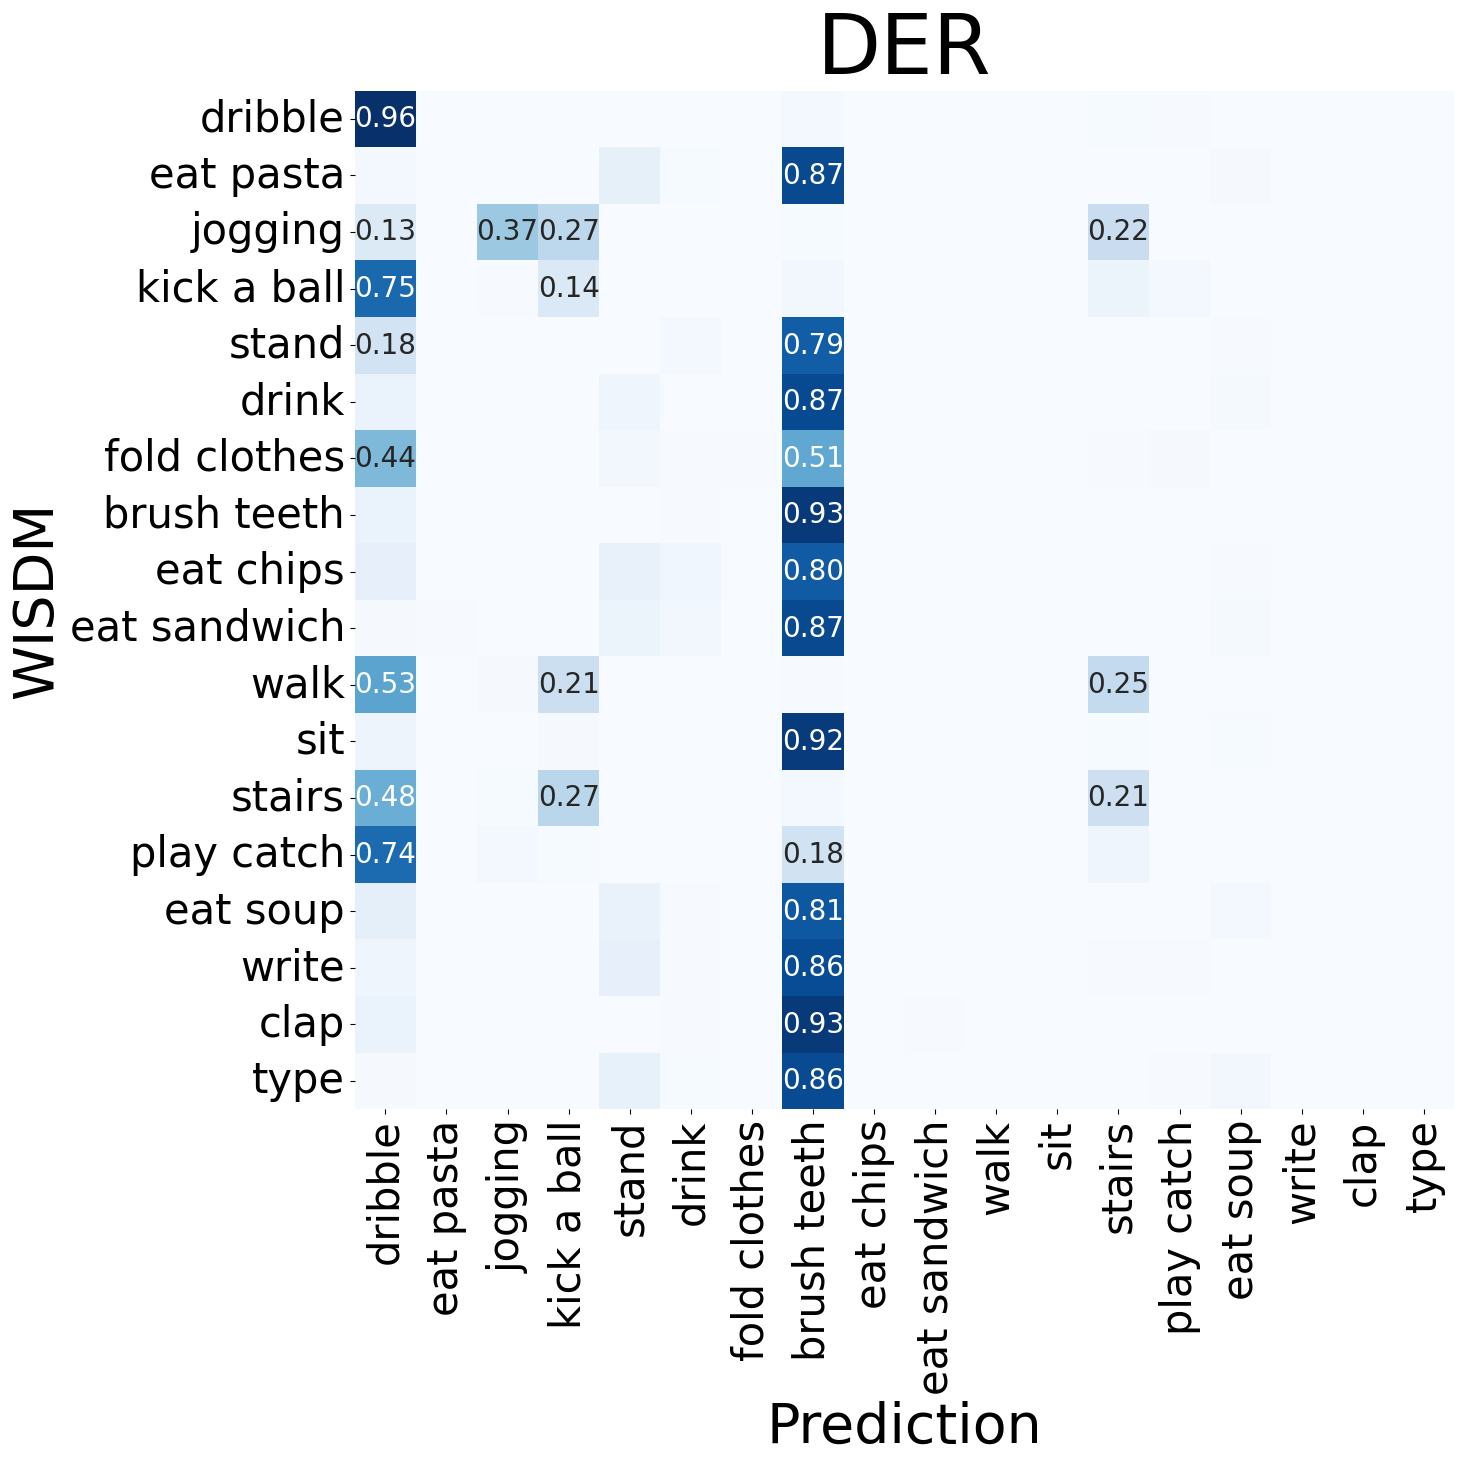

In [139]:
data = [
    [{'name': 'DSADS', 'cm': cf[0], 'model': 'DER'},
    {'name': 'PAMAP2', 'cm': cf[1], 'model': 'DER'},
    {'name': 'HAPT', 'cm': cf[2], 'model': 'DER'},
    {'name': 'WISDM', 'cm': cf[3], 'model': 'DER'},],
]


for j, dat_ in enumerate(data[0]):        
    fig, axs = plt.subplots(1, 1, figsize=(15, 15))
    cmn = dat_['cm'].astype('float') / dat_['cm'].sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cmn)
    annot_df = df_cm.applymap(lambda x: format_output(x))
    
    if j == 0:
        sns.heatmap(cmn, annot=annot_df, cmap='Blues', ax=axs, annot_kws={"fontsize":16}, fmt='', cbar=False)
    elif j == 1 or j == 2:
        sns.heatmap(cmn, annot=annot_df, cmap='Blues', ax=axs, annot_kws={"fontsize":25}, fmt='', cbar=False)
    elif j == 3:
        sns.heatmap(cmn, annot=annot_df, cmap='Blues', ax=axs, annot_kws={"fontsize":20}, fmt='', cbar=False)

    # if j == 0:
    # axs.set_ylabel(f'{dat_["name"]}\nTrue Class', fontsize=30)
    axs.set_ylabel(f'{dat_["name"]}', fontsize=40)
    # else:
    #     axs.set_ylabel(f'True Class', fontsize=15)
    
    axs.set_title(dat_["model"], fontsize=60)
    axs.set_xlabel('Prediction', fontsize=40)            

    # if j == 0:
    #     axs.set_xticklabels(y_labs[j], fontsize=30, rotation=90, ha='center')
    #     axs.set_yticklabels(y_labs[j], fontsize=30, rotation=0, ha='right')    
    # else:
    axs.set_xticklabels(y_labs[j], fontsize=30, rotation=90, ha='center')
    axs.set_yticklabels(y_labs[j], fontsize=30, rotation=0, ha='right')            
    
    plt.tight_layout(pad=2.0)
    # plt.show()
    fig.savefig(f'confusion_matrix_der_{dat_["name"]}.pdf');


# VE Hard

In [4]:
dsads_ve = pickle.load(open('ve_h_dsads_1.pkl', 'rb'))
pamap_ve = pickle.load(open('ve_h_pamap_5.pkl', 'rb'))
hapt_ve = pickle.load(open('ve_h_hapt_3.pkl', 'rb'))
wisdm_ve = pickle.load(open('ve_h_wisdm_1.pkl', 'rb'))

cf = []

In [5]:
# DSADS
reverse_dsads_map = {k:v for k, v in enumerate(dsads_ve['clsorder'])}
expert_dsads_map = {v: k for k, v in enumerate(dsads_dct['data']['clsorder'])}

y_true = np.vectorize(reverse_dsads_map.get)(dsads_ve['test_confusion_matrix']['true'])
y_true = np.vectorize(expert_dsads_map.get)(y_true)

y_preds = np.vectorize(reverse_dsads_map.get)(dsads_ve['test_confusion_matrix']['preds'])
y_preds = np.vectorize(expert_dsads_map.get)(y_preds)

cf.append(confusion_matrix(y_true, y_preds))

# PAMAP
reverse_pamap_map = {k:v for k, v in enumerate(pamap_ve['clsorder'])}
expert_pamap_map = {v: k for k, v in enumerate(pamap_dct['data']['clsorder'])}

y_true = np.vectorize(reverse_pamap_map.get)(pamap_ve['test_confusion_matrix']['true'])
y_true = np.vectorize(expert_pamap_map.get)(y_true)

y_preds = np.vectorize(reverse_pamap_map.get)(pamap_ve['test_confusion_matrix']['preds'])
y_preds = np.vectorize(expert_pamap_map.get)(y_preds)

cf.append(confusion_matrix(y_true, y_preds))

# HAPT
reverse_hapt_map = {k:v for k, v in enumerate(hapt_ve['clsorder'])}
expert_hapt_map = {v: k for k, v in enumerate(hapt_dct['data']['clsorder'])}

y_true = np.vectorize(reverse_hapt_map.get)(hapt_ve['test_confusion_matrix']['true'])
y_true = np.vectorize(expert_hapt_map.get)(y_true)

y_preds = np.vectorize(reverse_hapt_map.get)(hapt_ve['test_confusion_matrix']['preds'])
y_preds = np.vectorize(expert_hapt_map.get)(y_preds)

cf.append(confusion_matrix(y_true, y_preds))

# WISDM
reverse_wisdm_map = {k:v for k, v in enumerate(wisdm_ve['clsorder'])}
expert_wisdm_map = {v: k for k, v in enumerate(wisdm_dct['data']['clsorder'])}

y_true = np.vectorize(reverse_wisdm_map.get)(wisdm_ve['test_confusion_matrix']['true'])
y_true = np.vectorize(expert_wisdm_map.get)(y_true)

y_preds = np.vectorize(reverse_wisdm_map.get)(wisdm_ve['test_confusion_matrix']['preds'])
y_preds = np.vectorize(expert_wisdm_map.get)(y_preds)

cf.append(confusion_matrix(y_true, y_preds))

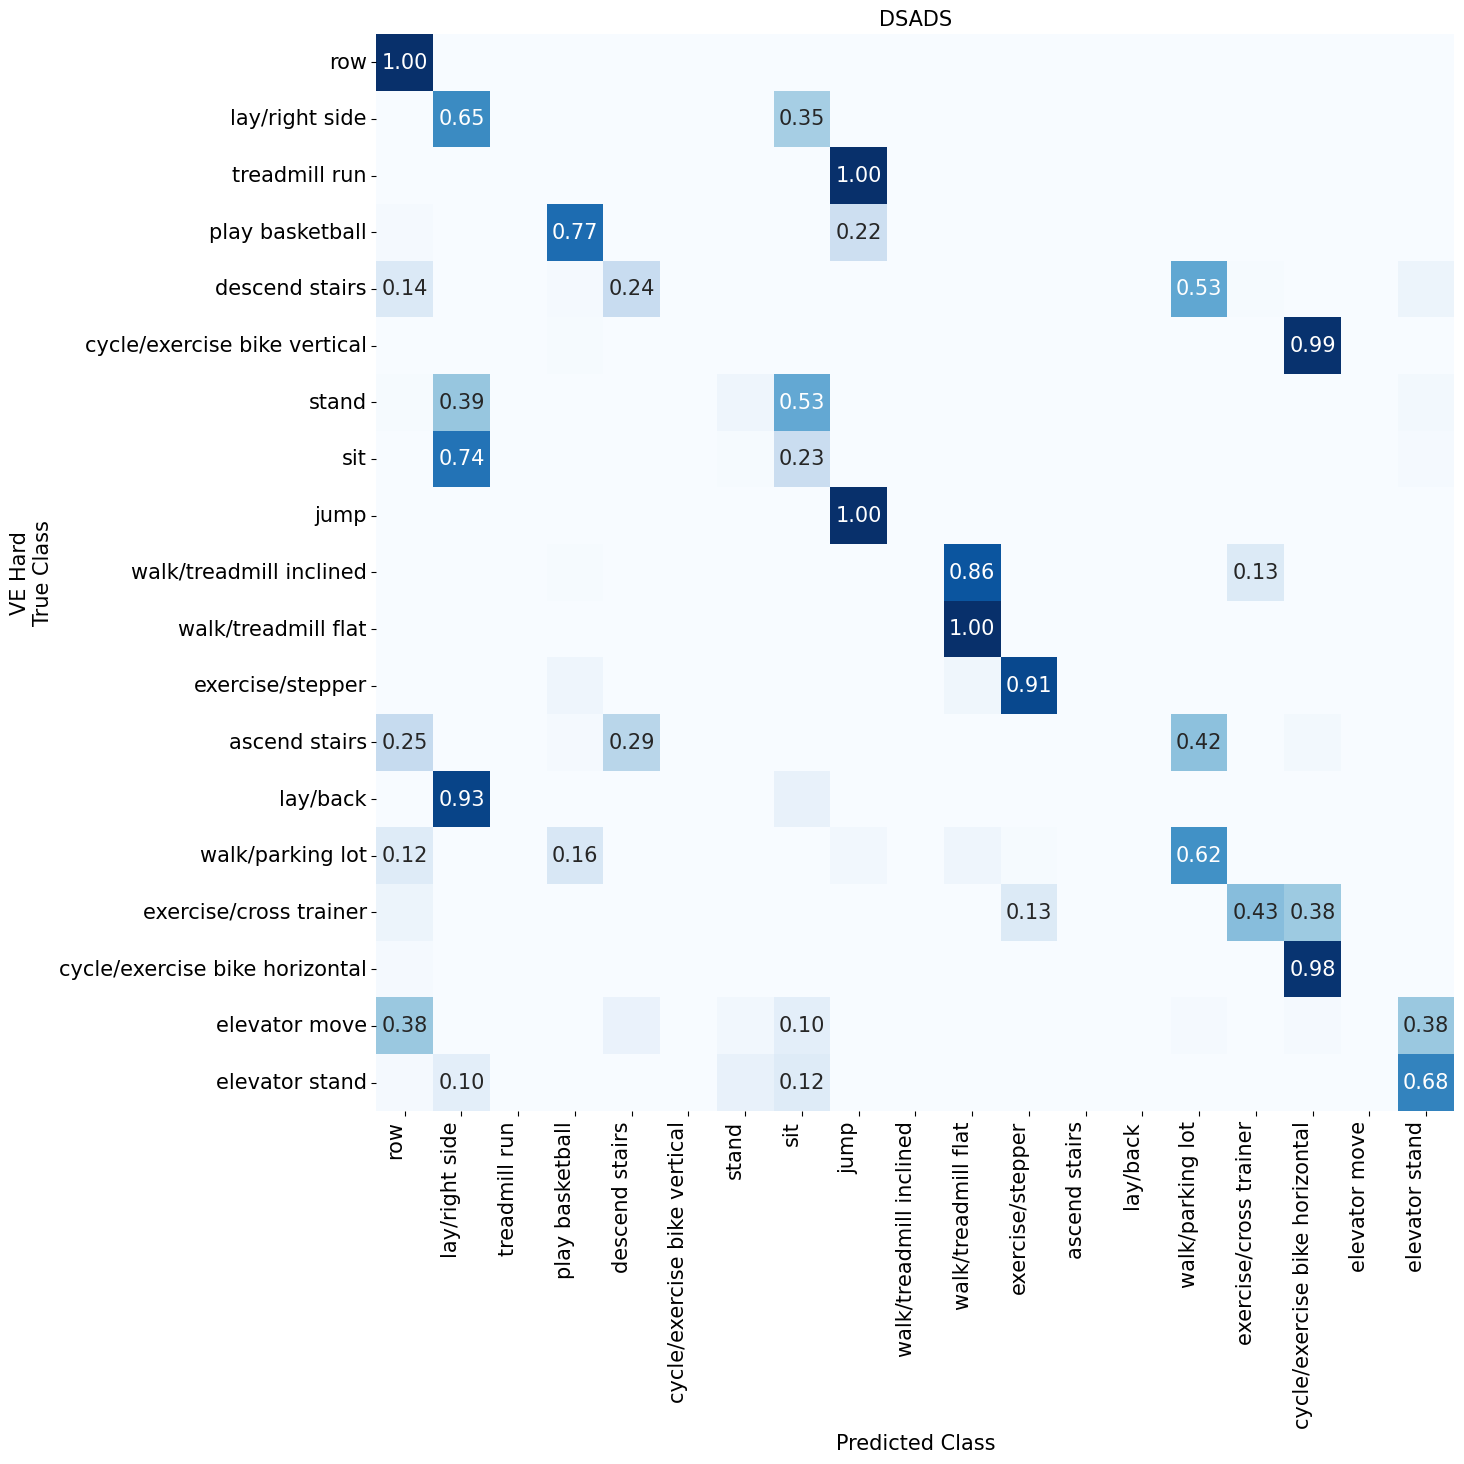

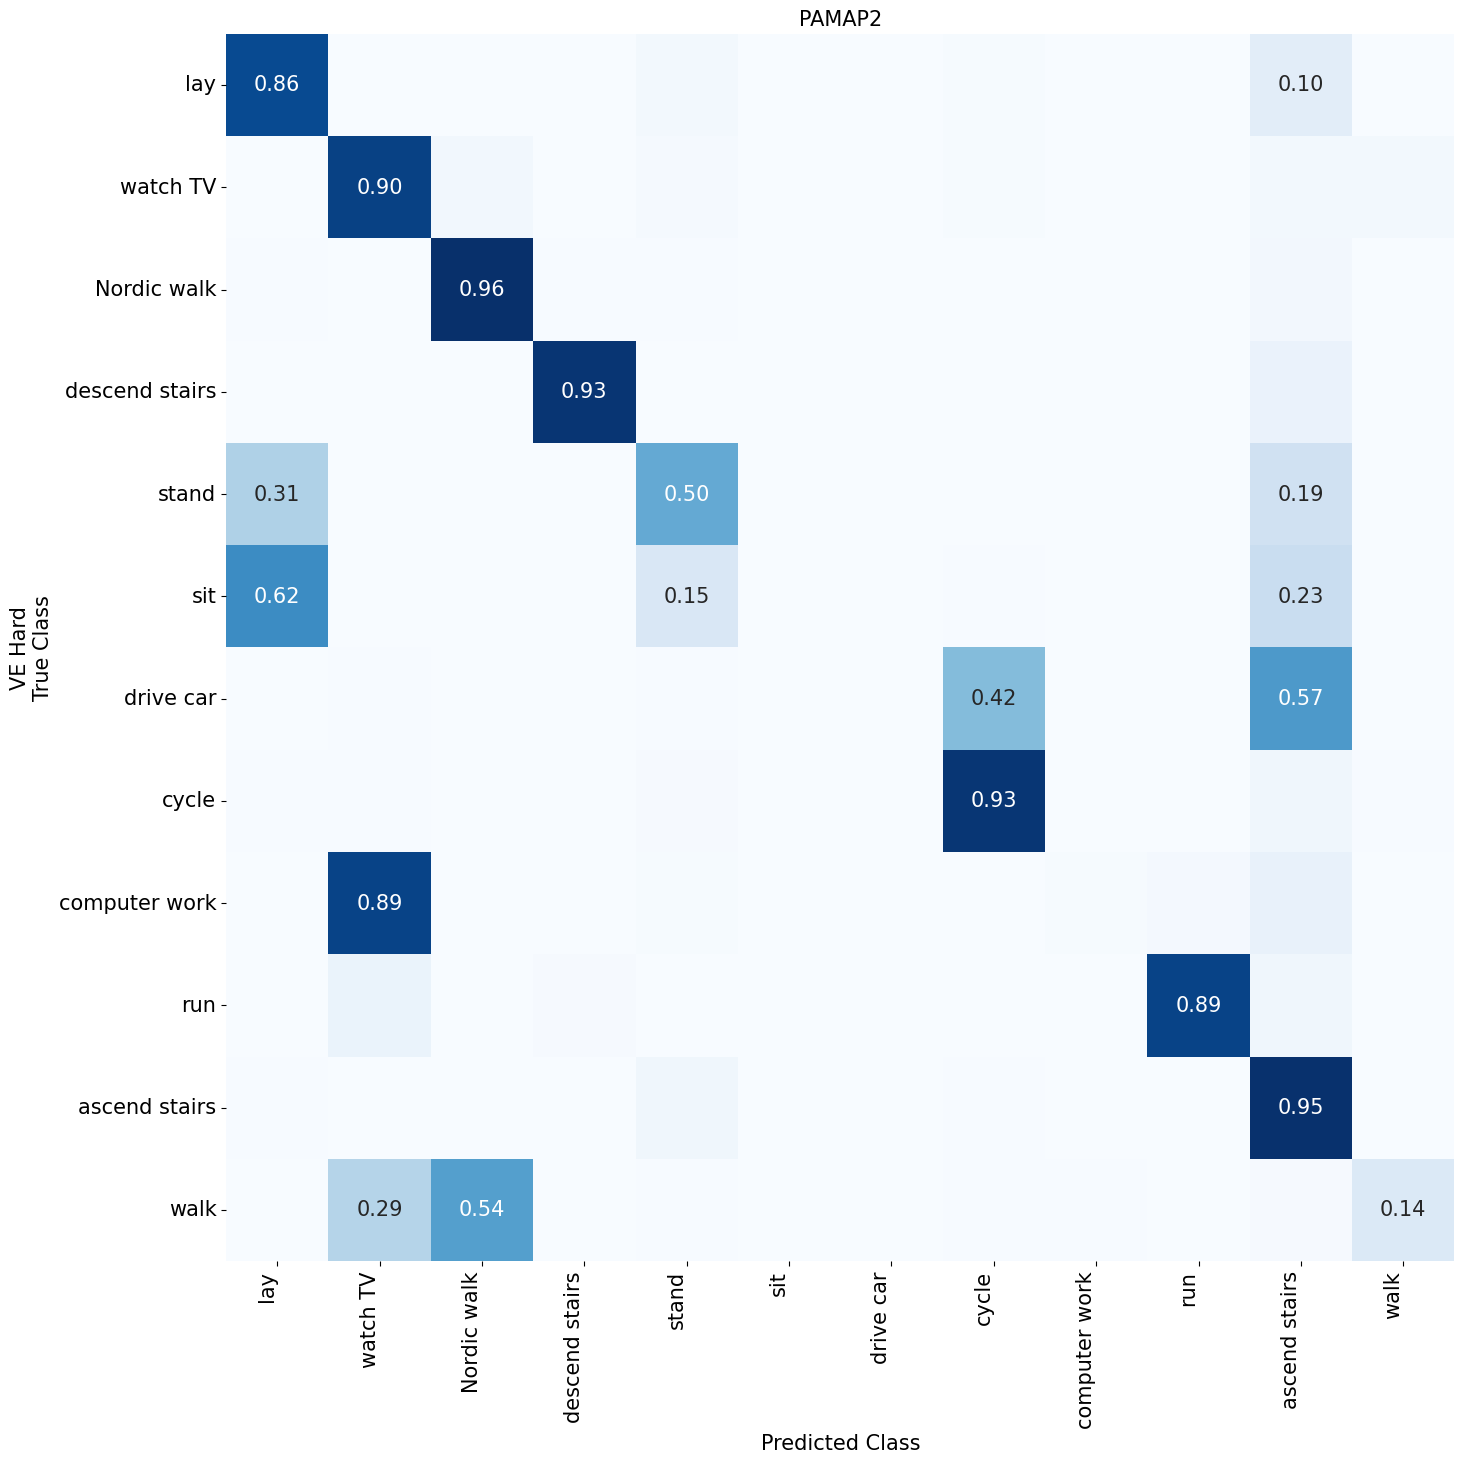

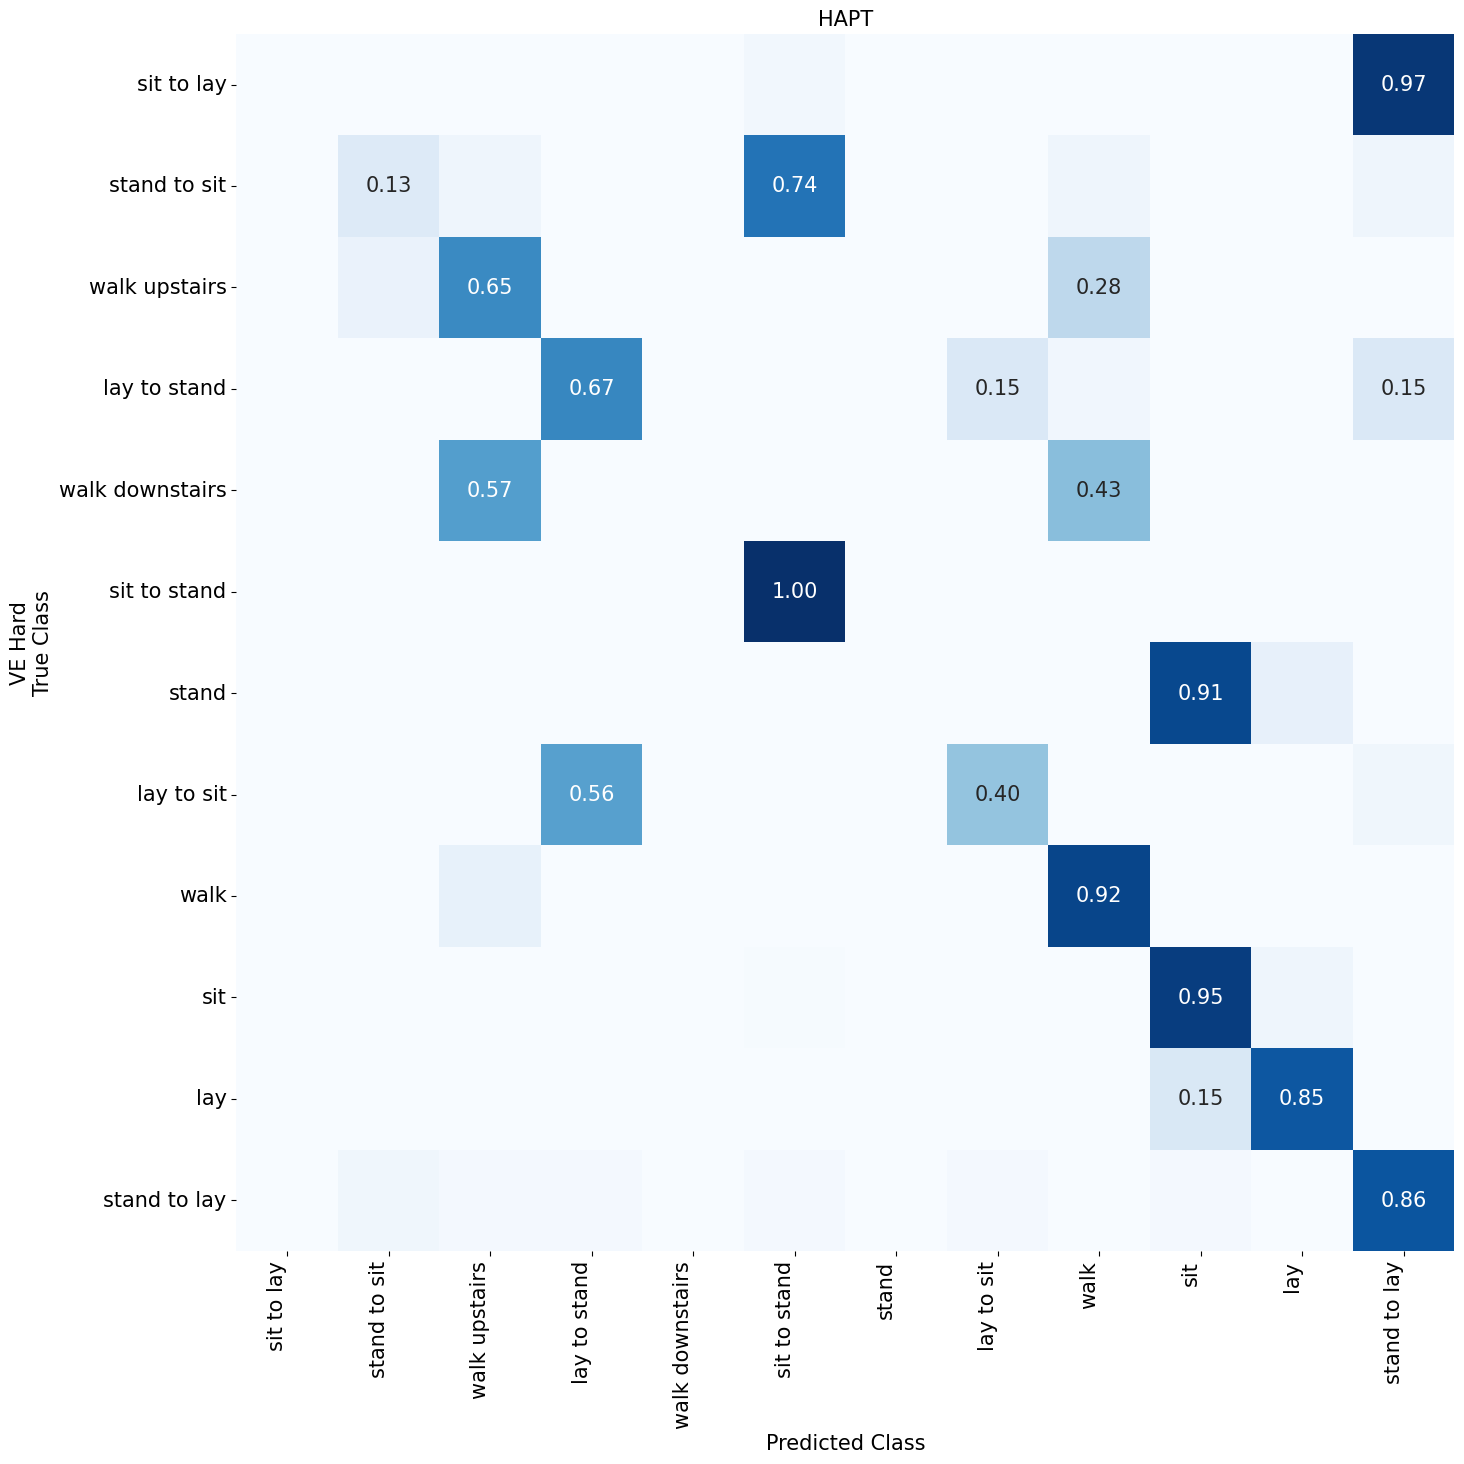

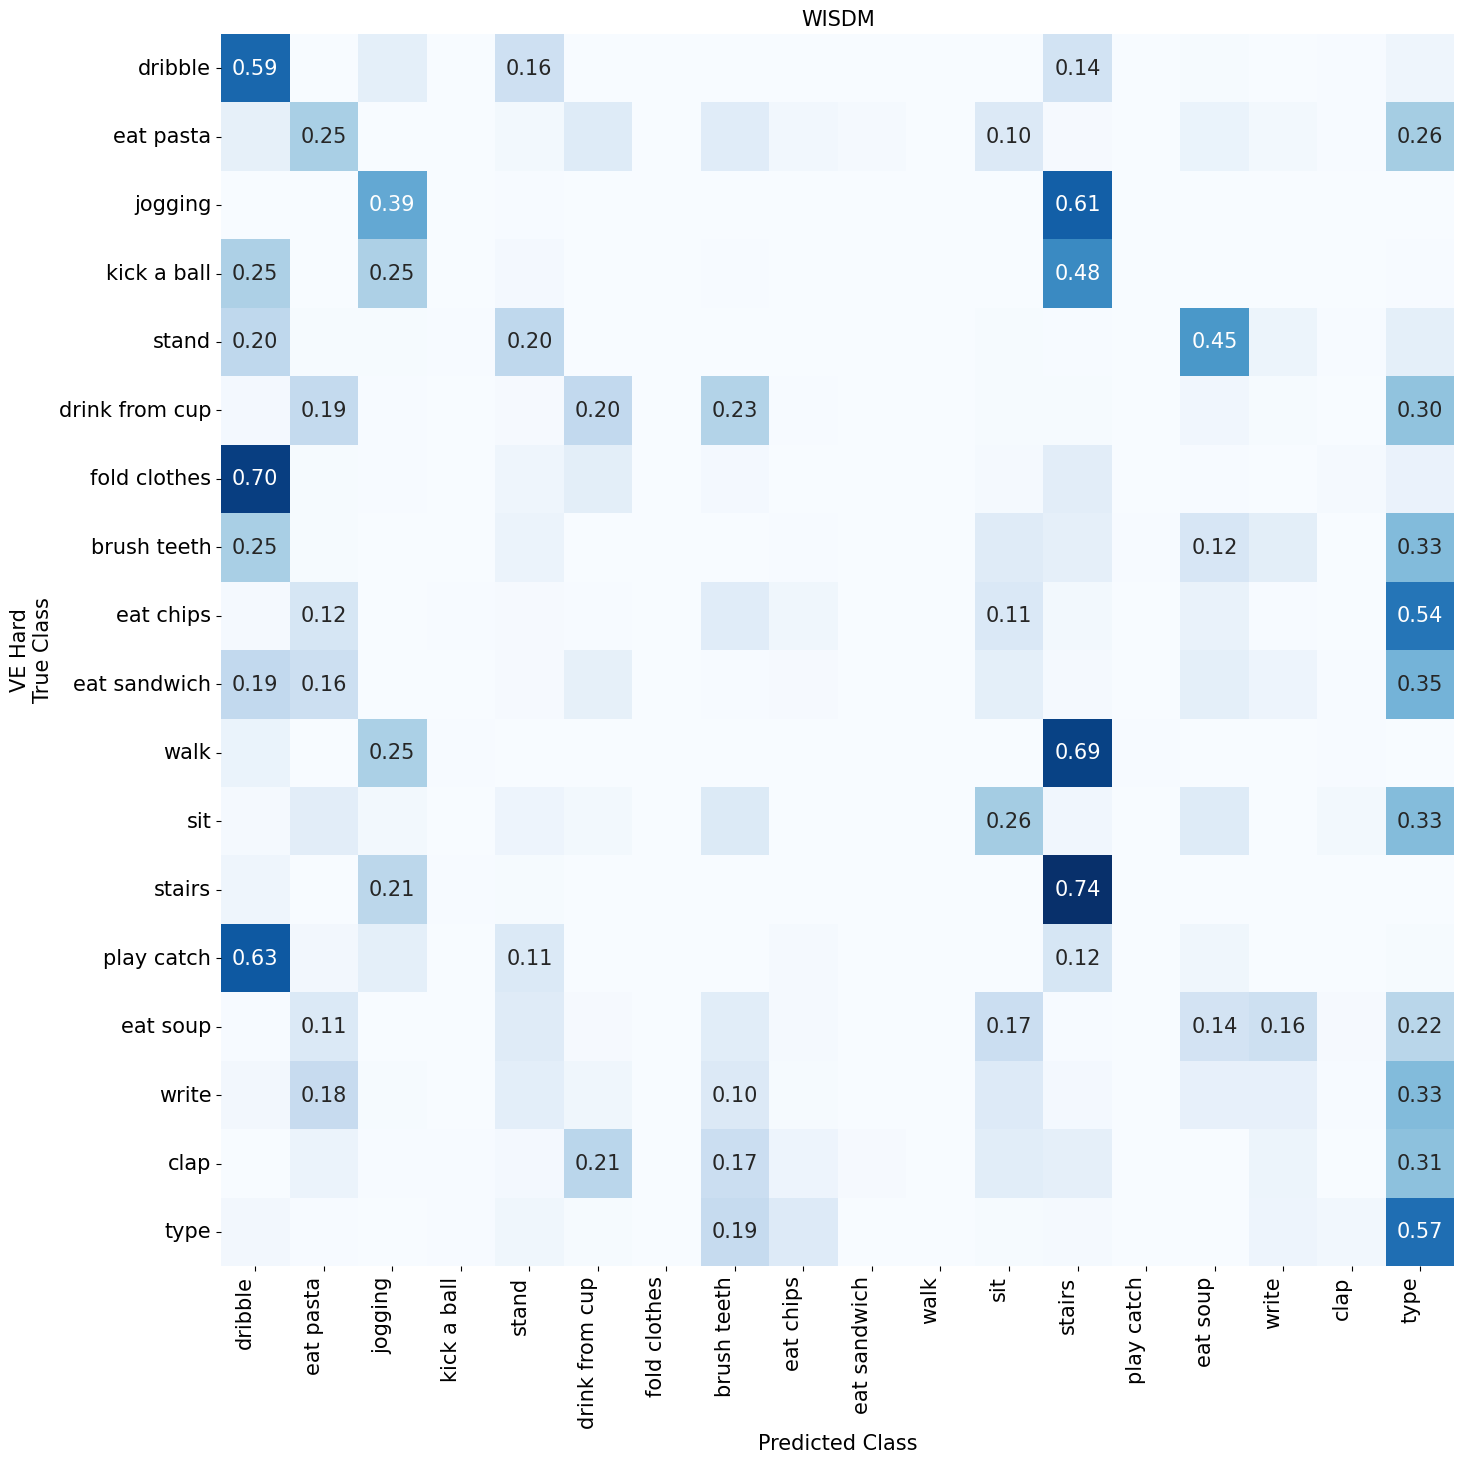

In [12]:
data = [
    [{'name': 'DSADS', 'cm': cf[0], 'model': 'VE Hard'},
    {'name': 'PAMAP2', 'cm': cf[1], 'model': 'VE Hard'},
    {'name': 'HAPT', 'cm': cf[2], 'model': 'VE Hard'},
    {'name': 'WISDM', 'cm': cf[3], 'model': 'VE Hard'},],
]


for j, dat_ in enumerate(data[0]):        
    fig, axs = plt.subplots(1, 1, figsize=(15, 15))
    cmn = dat_['cm'].astype('float') / dat_['cm'].sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cmn)
    annot_df = df_cm.applymap(lambda x: format_output(x))
    sns.heatmap(cmn, annot=annot_df, cmap='Blues', ax=axs, annot_kws={"fontsize":15}, fmt='', cbar=False)

    # if j == 0:
    axs.set_ylabel(f'{dat_["model"]}\nTrue Class', fontsize=15)
    # else:
    #     axs.set_ylabel(f'True Class', fontsize=15)

    # if i == 0:
    axs.set_title(dat_['name'], fontsize=15)
    axs.set_xlabel('Predicted Class', fontsize=15)            

    axs.set_xticklabels(y_labs[j], fontsize=15, rotation=90, ha='right')
    axs.set_yticklabels(y_labs[j], fontsize=15, rotation=0, ha='right')    
    
    plt.tight_layout(pad=2.0)
    # plt.show()
    fig.savefig(f'confusion_matrix_ve_{dat_["name"]}.pdf');


## Task progression accuracy

In [6]:
for k in dsads_dct.keys():
    print(k)

print(dsads_dct['val_accuracy'])

task_gmm_creation
class_gmm_creation
task_gmm_learning
class_gmm_learning
test_confusion_matrix
train_accuracy
train_loss
val_accuracy
val_loss
metric
expert_train_time
gate_train_time
data
{0: {'expert': 100.0, 'gate': 100.0}, 1: {'expert': 95.55555582046509, 'gate': 93.05555820465088}, 2: {'expert': 90.07936716079712, 'gate': 90.07936716079712}, 3: {'expert': 95.67901492118835, 'gate': 94.90740895271301}, 4: {'expert': 92.80303120613098, 'gate': 92.29797720909119}, 5: {'expert': 92.52136945724487, 'gate': 91.77350401878357}, 6: {'expert': 94.62962746620178, 'gate': 93.70370507240295}, 7: {'expert': 94.11764740943909, 'gate': 92.81045794487}, 8: {'expert': 91.81286692619324, 'gate': 90.49707651138306}}


In [7]:
dsads_acc_prog = [v['expert'] for k, v in dsads_dct['val_accuracy'].items()]
pamap_acc_prog = [v['expert'] for k, v in pamap_dct['val_accuracy'].items()]
hapt_acc_prog = [v['expert'] for k, v in hapt_dct['val_accuracy'].items()]
wisdm_acc_prog = [v['expert'] for k, v in wisdm_dct['val_accuracy'].items()]

print(dsads_acc_prog)
print(pamap_acc_prog)
print(hapt_acc_prog)
print(wisdm_acc_prog)

[100.0, 95.55555582046509, 90.07936716079712, 95.67901492118835, 92.80303120613098, 92.52136945724487, 94.62962746620178, 94.11764740943909, 91.81286692619324]
[97.46835231781006, 97.02970385551453, 92.07921028137207, 90.31378030776978, 90.55023789405823, 93.17343235015869]
[100.0, 97.58620858192444, 98.70129823684692, 96.6867446899414, 97.82100915908813, 95.9433376789093]
[99.25925731658936, 96.5605080127716, 82.39148259162903, 70.31055688858032, 62.543994188308716, 57.961249351501465, 53.799718618392944, 49.19404983520508, 45.65396308898926]


In [8]:
# print(dsads_acc_prog)
# print(dsads_gdumb['class_il_acc'][-1])
# print(dsads_der['class_il_acc'][-1])
# print(dsads_ve['task_accuracy'])

exp_acc = [dsads_acc_prog, pamap_acc_prog, hapt_acc_prog, wisdm_acc_prog]
gdumb_acc = [dsads_gdumb['class_il_acc'][-1], pamap_gdumb['class_il_acc'][-1], hapt_gdumb['class_il_acc'][-1], wisdm_gdumb['class_il_acc'][-1]]
der_acc = [dsads_der['class_il_acc'][-1], pamap_der['class_il_acc'][-1], hapt_der['class_il_acc'][-1], wisdm_der['class_il_acc'][-1]]
ve_acc = [dsads_ve['task_accuracy'], pamap_ve['task_accuracy'], hapt_ve['task_accuracy'], wisdm_ve['task_accuracy']]

data_order = ['DSADS', 'PAMAP2', 'HAPT', 'WISDM']
acc_dictionary = {}

for i, dt in enumerate(data_order):
    outputs = []
    for idx, (exp_, gdumb_, der_, ve_) in enumerate(zip(exp_acc[i], gdumb_acc[i], der_acc[i], ve_acc[i])):
        outputs.append([idx, "DMOE", exp_])
        outputs.append([idx, "Gdumb", gdumb_])
        outputs.append([idx, "DER", der_])
        outputs.append([idx, "VE", ve_])

    acc_dictionary[dt] = outputs

print(acc_dictionary)
# print(outputs)
# test = pd.DataFrame(outputs, columns=['task', 'model', 'accuracy'])
# test_wide = test.pivot('task', 'model', 'accuracy')

{'DSADS': [[0, 'DMOE', 100.0], [0, 'Gdumb', 71.38888888888889], [0, 'DER', 45.27777777777778], [0, 'VE', 100.0], [1, 'DMOE', 95.55555582046509], [1, 'Gdumb', 72.5], [1, 'DER', 30.416666666666664], [1, 'VE', 39.72222222222222], [2, 'DMOE', 90.07936716079712], [2, 'Gdumb', 57.49999999999999], [2, 'DER', 18.75], [2, 'VE', 28.57142857142857], [3, 'DMOE', 95.67901492118835], [3, 'Gdumb', 100.0], [3, 'DER', 47.083333333333336], [3, 'VE', 22.839506172839506], [4, 'DMOE', 92.80303120613098], [4, 'Gdumb', 62.083333333333336], [4, 'DER', 30.0], [4, 'VE', 18.181818181818183], [5, 'DMOE', 92.52136945724487], [5, 'Gdumb', 88.75], [5, 'DER', 88.75], [5, 'VE', 15.598290598290598], [6, 'DMOE', 94.62962746620178], [6, 'Gdumb', 100.0], [6, 'DER', 75.0], [6, 'VE', 13.240740740740742], [7, 'DMOE', 94.11764740943909], [7, 'Gdumb', 76.25], [7, 'DER', 7.5], [7, 'VE', 11.76470588235294], [8, 'DMOE', 91.81286692619324], [8, 'Gdumb', 75.0], [8, 'DER', 100.0], [8, 'VE', 10.526315789473683]], 'PAMAP2': [[0, 'DMOE

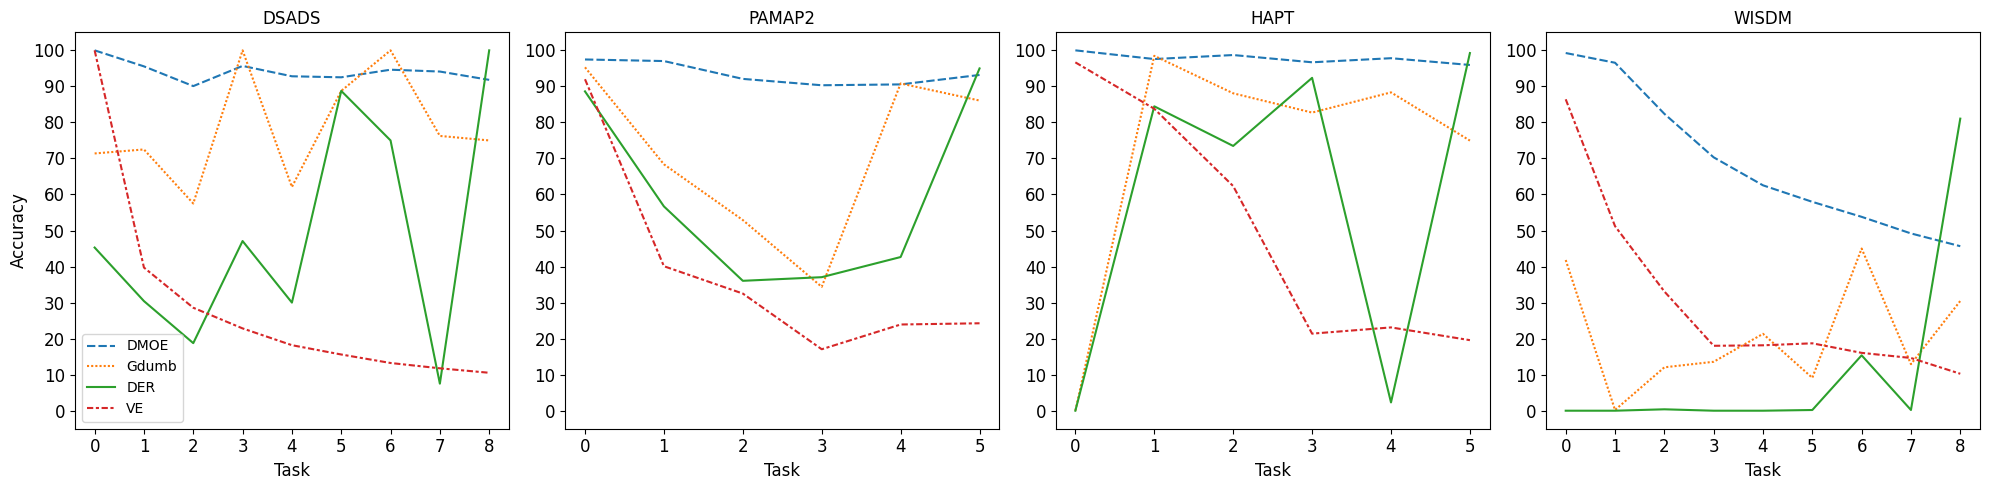

In [14]:
hue_order = ['DMOE', 'Gdumb', 'DER', 'VE']

fig, axs = plt.subplots(1, len(acc_dictionary), figsize=(20, 5))
y_ticks = [10 * i for i in range(11)]
x_labs = [
    [i for i in range(9)],
    [i for i in range(6)],
    [i for i in range(6)],
    [i for i in range(9)]
]

for i, (k, v) in enumerate(acc_dictionary.items()):
    df = pd.DataFrame(v, columns=['task', 'model', 'accuracy'])
    df = df.pivot('task', 'model', 'accuracy')
    sns.lineplot(data=df, ax=axs[i], hue_order=hue_order)
    axs[i].set_title(data_order[i])
    if i == 0:
        axs[i].set_ylabel('Accuracy', fontsize=12)
    axs[i].set_xlabel('Task', fontsize=12)
    
    if i == 0:
        axs[i].legend(loc='lower left', title='')
    else:
        axs[i].get_legend().remove()

    axs[i].set_ylim([-5, 105])
    axs[i].set_yticks(y_ticks)
    axs[i].set_yticklabels(y_ticks, fontsize=12)
    axs[i].yaxis.set_major_formatter('{x}')    

    axs[i].set_xticks(x_labs[i])
    axs[i].set_xticklabels(x_labs[i], fontsize=12)

plt.tight_layout()
plt.show()
fig.savefig('task_progression.pdf');


# Update current DMOE pkls to add prediction time

In [27]:
# dsads_dct['prediction_time'] = 0.0012528400000064721
# pamap_dct['prediction_time'] = 0.0017706609999095235
# hapt_dct['prediction_time'] = 0.0012658640000609012
# wisdm_dct['prediction_time'] = 0.0017558229997121089

# pickle.dump(dsads_dct, open('dsads.pkl', 'wb'))
# pickle.dump(pamap_dct, open('pamap.pkl', 'wb'))
# pickle.dump(hapt_dct, open('hapt.pkl', 'wb'))
# pickle.dump(wisdm_dct, open('wisdm.pkl', 'wb'))

In [41]:
# dsads_ve['train_time'] = {0: 28.587402069, 1: 19.727750003000004, 2: 20.470513653999994, 3: 21.151629631000006, 4: 21.687840125999998, 5: 22.332983463000005, 6: 21.45641286, 7: 21.130171227999995, 8: 21.703181341000004}
# pamap_ve['train_time'] = {0: 31.387518732000004, 1: 21.826309109, 2: 26.954736858000004, 3: 18.256698252999996, 4: 15.713295243000005, 5: 34.32822034600001}
# hapt_ve['train_time'] = {0: 3.745743571, 1: 27.646198711, 2: 46.489315811999994, 3: 22.91590491699999, 4: 29.018819773999994, 5: 27.488907753999996}
# wisdm_ve['train_time'] = {0: 70.842958329, 1: 64.84551853099998, 2: 77.658508743, 3: 70.03105526499999, 4: 69.58666691100001, 5: 68.57902547499998, 6: 80.89269652599995, 7: 81.20273298100005, 8: 75.48139733200003}

# dsads_ve['prediction_time'] = 0.0005024829999911162
# pamap_ve['prediction_time'] = 0.0004975530000024264
# hapt_ve['prediction_time'] = 0.0004833459999815659
# wisdm_ve['prediction_time'] = 0.0004377609999437482

# pickle.dump(dsads_ve, open('ve_h_dsads.pkl', 'wb'))
# pickle.dump(pamap_ve, open('ve_h_pamap.pkl', 'wb'))
# pickle.dump(hapt_ve, open('ve_h_hapt.pkl', 'wb'))
# pickle.dump(wisdm_ve, open('ve_h_wisdm.pkl', 'wb'))

In [50]:
# dsads_gdumb['task_train_time'] = {0: 3.2582849429999996, 1: 2.1532876829999985, 2: 2.142889867000001, 3: 2.136290744, 4: 2.1405364989999995, 5: 2.1381809149999995, 6: 2.141492839999998, 7: 2.1407967270000015, 8: 2.132469265000001}
# pamap_gdumb['task_train_time'] = {0: 3.484362054, 1: 2.4381233820000006, 2: 2.929361307999999, 3: 1.8916510619999976, 4: 1.526515462999999, 5: 3.5808035070000024}
# hapt_gdumb['task_train_time'] = {0: 0.412441123999999, 1: 3.082189948, 2: 5.607153824000001, 3: 2.686949869000003, 4: 3.4033041490000002, 5: 3.166277972000003}
# wisdm_gdumb['task_train_time'] = {0: 14.234974737, 1: 13.279442414000002, 2: 15.247784648000007, 3: 13.649200126000004, 4: 13.33030679800001, 5: 13.48632145100001, 6: 15.457443353000002, 7: 14.373716004000002, 8: 14.706959257000008}

# dsads_gdumb['prediction_time'] = 0.0002196219999994753
# pamap_gdumb['prediction_time'] = 0.00021341999999791028
# hapt_gdumb['prediction_time'] = 0.0002212850000020694
# wisdm_gdumb['prediction_time'] = 0.00020793000001617656

# pickle.dump(dsads_gdumb, open('gdumb_dsads.pkl', 'wb'))
# pickle.dump(pamap_gdumb, open('gdumb_pamap.pkl', 'wb'))
# pickle.dump(hapt_gdumb, open('gdumb_hapt.pkl', 'wb'))
# pickle.dump(wisdm_gdumb, open('gdumb_wisdm.pkl', 'wb'))



In [55]:
# dsads_der['task_train_time'] = {0: 14.714463457999999, 1: 9.375639008000004, 2: 9.334949688000002, 3: 9.154887150999997, 4: 9.651725303999996, 5: 9.146444203999998, 6: 9.117029580000008, 7: 9.13699027700001, 8: 9.141607155000003}
# pamap_der['task_train_time'] = {0: 15.369587545, 1: 10.67839901, 2: 12.999058093000002, 3: 8.232602213, 4: 6.6801604930000025, 5: 15.832835000000003}
# hapt_der['task_train_time'] = {0: 1.749639096000001, 1: 13.963069831999999, 2: 24.479716318000005, 3: 11.888913975999998, 4: 15.205432169999995, 5: 14.066342635000012}
# wisdm_der['task_train_time'] = {0: 75.235052591, 1: 68.91594240400002, 2: 80.073809238, 3: 71.007219598, 4: 69.55711385000001, 5: 70.010622421, 6: 81.44726072499998, 7: 76.54340199500007, 8: 78.12630770500004}

# dsads_der['prediction_time'] = 0.0002078199999999697
# pamap_der['prediction_time'] = 0.0002097929999962389
# hapt_der['prediction_time'] = 0.00020622700000672012
# wisdm_der['prediction_time'] = 0.00018882400001984934

# pickle.dump(dsads_der, open('der_dsads.pkl', 'wb'))
# pickle.dump(pamap_der, open('der_pamap.pkl', 'wb'))
# pickle.dump(hapt_der, open('der_hapt.pkl', 'wb'))
# pickle.dump(wisdm_der, open('der_wisdm.pkl', 'wb'))

## Train time and prediction time for Joint and Finetune

In [62]:
dsads_joint = pickle.load(open('joint_dsads.pkl', 'rb'))
pamap_joint = pickle.load(open('joint_pamap.pkl', 'rb'))
hapt_joint = pickle.load(open('joint_hapt.pkl', 'rb'))
wisdm_joint = pickle.load(open('joint_wisdm.pkl', 'rb'))

dsads_finetune = pickle.load(open('finetune_dsads.pkl', 'rb'))
pamap_finetune = pickle.load(open('finetune_pamap.pkl', 'rb'))
hapt_finetune = pickle.load(open('finetune_hapt.pkl', 'rb'))
wisdm_finetune = pickle.load(open('finetune_wisdm.pkl', 'rb'))

joint = [dsads_joint, pamap_joint, hapt_joint, wisdm_joint]
finetune = [dsads_finetune, pamap_finetune, hapt_finetune, wisdm_finetune]

for j in joint:
    print(j)

print()

for fi in finetune:
    task_train_time = [v for k, v in fi['task_train_time'].items()]
    task_train_time.append(fi['prediction_time'])
    print(task_train_time)
    print(f"{fi['total_train_time'], fi['prediction_time']}")
    print()

{'train_time': 107.285179238, 'predict_time': 0.0002072380000015528}
{'train_time': 89.34641546900001, 'predict_time': 0.00017258400001196605}
{'train_time': 101.636974752, 'predict_time': 0.00022973999999464922}
{'train_time': 964.9320319679999, 'predict_time': 0.0002530550000301446}

[21.388004684000002, 13.083263469999999, 13.076676053999996, 13.09612997, 13.076406054999993, 13.092994783999998, 13.128134313000004, 13.166257316, 13.170719656999992, 0.00020855100001426763]
(127.75703954200002, 0.00020855100001426763)

[15.515630861999998, 15.135275037, 20.144868979, 15.076024971000002, 14.092822034000008, 21.30158391399999, 0.00020244999998908497]
(102.0262109, 0.00020244999998908497)

[21.578176487, 18.643433255, 41.310562747000006, 1.221429563000001, 2.6348176589999923, 30.057983432, 0.0001814299999978175]
(116.702032092, 0.0001814299999978175)

[129.852620221, 119.152636194, 119.20212093699999, 117.60570349900001, 113.493905004, 124.50690645499992, 114.357938031, 128.98306717100002

In [61]:
dsads_finetune.keys()

dict_keys(['task_train_time', 'prediction_time', 'total_train_time'])

## Train time and prediction time for Gdumb

In [10]:
gdumb = [dsads_gdumb, pamap_gdumb, hapt_gdumb, wisdm_gdumb]
for g in gdumb:
    task_train_time = [v for k, v in g['task_train_time'].items()]
    task_train_time.append(g['prediction_time'])
    print(task_train_time)

[3.2582849429999996, 2.1532876829999985, 2.142889867000001, 2.136290744, 2.1405364989999995, 2.1381809149999995, 2.141492839999998, 2.1407967270000015, 2.132469265000001, 0.0002196219999994753]
[3.484362054, 2.4381233820000006, 2.929361307999999, 1.8916510619999976, 1.526515462999999, 3.5808035070000024, 0.00021341999999791028]
[0.412441123999999, 3.082189948, 5.607153824000001, 2.686949869000003, 3.4033041490000002, 3.166277972000003, 0.0002212850000020694]
[14.234974737, 13.279442414000002, 15.247784648000007, 13.649200126000004, 13.33030679800001, 13.48632145100001, 15.457443353000002, 14.373716004000002, 14.706959257000008, 0.00020793000001617656]


## Train time and prediction time for DER

In [12]:
der = [dsads_der, pamap_der, hapt_der, wisdm_der]
for d in der:
    task_train_time = [v for k, v in d['task_train_time'].items()]
    task_train_time.append(d['prediction_time'])
    print(task_train_time)

[14.714463457999999, 9.375639008000004, 9.334949688000002, 9.154887150999997, 9.651725303999996, 9.146444203999998, 9.117029580000008, 9.13699027700001, 9.141607155000003, 0.0002078199999999697]
[15.369587545, 10.67839901, 12.999058093000002, 8.232602213, 6.6801604930000025, 15.832835000000003, 0.0002097929999962389]
[1.749639096000001, 13.963069831999999, 24.479716318000005, 11.888913975999998, 15.205432169999995, 14.066342635000012, 0.00020622700000672012]
[75.235052591, 68.91594240400002, 80.073809238, 71.007219598, 69.55711385000001, 70.010622421, 81.44726072499998, 76.54340199500007, 78.12630770500004, 0.00018882400001984934]


## Train time and prediction time for VE Hard

In [17]:
ve = [dsads_ve, pamap_ve, hapt_ve, wisdm_ve]
for v_ in ve:
    task_train_time = [v for k, v in v_['train_time'].items()]
    task_train_time.append(v_['prediction_time'])
    print(task_train_time)

[28.587402069, 19.727750003000004, 20.470513653999994, 21.151629631000006, 21.687840125999998, 22.332983463000005, 21.45641286, 21.130171227999995, 21.703181341000004, 0.0005024829999911162]
[31.387518732000004, 21.826309109, 26.954736858000004, 18.256698252999996, 15.713295243000005, 34.32822034600001, 0.0004975530000024264]
[3.745743571, 27.646198711, 46.489315811999994, 22.91590491699999, 29.018819773999994, 27.488907753999996, 0.0004833459999815659]
[70.842958329, 64.84551853099998, 77.658508743, 70.03105526499999, 69.58666691100001, 68.57902547499998, 80.89269652599995, 81.20273298100005, 75.48139733200003, 0.0004377609999437482]


## Train time and prediction time for Expert/Gate

In [21]:
expert = [dsads_dct, pamap_dct, hapt_dct, wisdm_dct]
dsads_dct.keys()

for e in expert:
    expert_train_time = [v for k, v in e['expert_train_time'].items()]
    expert_train_time.append(e['prediction_time'])
    gate_train_time = [v for k, v in e['gate_train_time'].items()]
    gmm_train_time = [v for k, v in e['task_gmm_learning'].items()]
    gmm_sample_time = [v for k, v in e['task_gmm_creation'].items()]

    print(expert_train_time)
    print(gate_train_time)
    print(gmm_train_time)
    print(gmm_sample_time)
    print()


[10.337515590999999, 6.2288915489999965, 6.530305605999985, 8.580468178999979, 8.612212619000047, 8.295830206000005, 8.13049490700007, 8.949684854999987, 9.268974826999965, 0.0012528400000064721]
[13.230309771999998, 30.000216421000005, 48.329961637999986, 70.04015138100004, 98.41000619799996, 128.17411447799998, 155.03642453399993, 193.40086665700005, 247.09898019399998]
[42.341829528, 23.155501992000012, 22.57229161800001, 30.333457840999984, 29.25995518999997, 27.666241427000045, 28.597843617999956, 23.027522793000003, 31.792233485999986]
[7.9406389450000034, 14.080981500000007, 20.152103818, 25.344644232999997, 34.13113421600002, 39.66121456699989, 47.03767291700001, 49.75902568000015, 54.47981759300001]

[11.687074500000001, 7.282063176999998, 9.95312930099999, 7.993447661000005, 7.351712005000024, 13.968712951999976, 0.0017706609999095235]
[15.893381303999995, 36.409873253000015, 63.00669207999999, 89.194950205, 76.10411972899999, 219.640471337]
[27.043153139999998, 14.9031735410

## All tasks training time for Expert

In [27]:
inp = ['dsads.txt', 'pamap.txt', 'hapt.txt', 'wisdm.txt']

for inp_ in inp:
    with open(inp_) as f:
        lines = f.readlines()
        idx = max(loc for loc, val in enumerate(lines) if 'Wall time' in val)
        train_time = float(lines[idx].split('Wall time:')[1])
        print(train_time)

1047.11763381958
541.6420178413391
983.6457393169403
2853.0875957012177


## All tasks training time for VE Hard

In [28]:
inp = ['ve_h_dsads.txt', 've_h_pamap.txt', 've_h_hapt.txt', 've_h_wisdm.txt']

for inp_ in inp:
    with open(inp_) as f:
        lines = f.readlines()
        idx = max(loc for loc, val in enumerate(lines) if 'Wall time' in val)
        train_time = float(lines[idx].split('Wall time:')[1])
        print(train_time)

204.0962097644806
150.97997331619263
160.25901699066162
645.7544512748718


## All tasks training time for VE Average

In [41]:
dsads_ve_a = pickle.load(open('ve_a_dsads.pkl', 'rb'))
pamap_ve_a = pickle.load(open('ve_a_pamap.pkl', 'rb'))
hapt_ve_a = pickle.load(open('ve_a_hapt.pkl', 'rb'))
wisdm_ve_a = pickle.load(open('ve_a_wisdm.pkl', 'rb'))

ve_average = [dsads_ve_a, pamap_ve_a, hapt_ve_a, wisdm_ve_a]

for ve_a in ve_average:
    print(f"{ve_a['total_train_time']}, {ve_a['prediction_time']}")

196.22657510599998 0.0004974329999924976
145.830893856 0.0004850699999963126
169.779751214 0.00049062999997318
1666.328487661 0.00043995499981974717


## All tasks training time for VE Majority

In [47]:
dsads_ve_m = pickle.load(open('ve_m_dsads.pkl', 'rb'))
pamap_ve_m = pickle.load(open('ve_m_pamap.pkl', 'rb'))
hapt_ve_m = pickle.load(open('ve_m_hapt.pkl', 'rb'))
wisdm_ve_m = pickle.load(open('ve_m_wisdm.pkl', 'rb'))

ve_majority = [dsads_ve_m, pamap_ve_m, hapt_ve_m, wisdm_ve_m]

for ve_m in ve_majority:
        print(f"{ve_m['total_train_time']}, {ve_m['prediction_time']}")

3132.5767330050003, 0.0004937859998790373
2367.743406116, 0.0005255349997241865
2730.6089888330002, 0.0004904800002805132
26758.352752749, 0.00043726999865612015


## All tasks train time for Gdumb

In [37]:
gdumb = [dsads_gdumb, pamap_gdumb, hapt_gdumb, wisdm_gdumb]
for g in gdumb:  
    print(f"{g['train_time']}, {g['prediction_time']}")

25.094713459, 0.0002196219999994753
19.488740368000002, 0.00021341999999791028
24.375740209999996, 0.0002212850000020694
56.705298236999994, 0.00020793000001617656


## All tasks train time for DER

In [38]:
der = [dsads_der, pamap_der, hapt_der, wisdm_der]
for d in der:
    print(f"{d['train_time']}, {d['prediction_time']}")

90.672470412, 0.0002078199999999697
74.492959745, 0.0002097929999962389
86.000133707, 0.00020622700000672012
678.261788821, 0.00018882400001984934


## All tasks train time for LwF

In [49]:
dsads_lwf = pickle.load(open('lwf_dsads.pkl', 'rb'))
pamap_lwf = pickle.load(open('lwf_pamap.pkl', 'rb'))
hapt_lwf = pickle.load(open('lwf_hapt.pkl', 'rb'))
wisdm_lwf = pickle.load(open('lwf_wisdm.pkl', 'rb'))

lwf = [dsads_lwf, pamap_lwf, hapt_lwf, wisdm_lwf]

for l in lwf:
    print(f"{l['train_time']}, {l['prediction_time']}")

57.725537022, 0.00021487299999023435
44.204670011999994, 0.00018817299999795978
55.838294721, 0.00019604799999228817
454.427306186, 0.00019882299994833375


## All tasks train time for EWC

In [53]:
dsads_ewc = pickle.load(open('ewc_dsads.pkl', 'rb'))
pamap_ewc = pickle.load(open('ewc_pamap.pkl', 'rb'))
hapt_ewc = pickle.load(open('ewc_hapt.pkl', 'rb'))
wisdm_ewc = pickle.load(open('ewc_wisdm.pkl', 'rb'))

ewc = [dsads_ewc, pamap_ewc, hapt_ewc, wisdm_ewc]

for e in ewc:
    print(f"{e['train_time']}, {e['prediction_time']}")

58.244898285000005, 0.0001936139999969555
48.157093521, 0.00019044700000137027
60.007958599999995, 0.00019620800000552663
488.171047379, 0.00018770199994833092


## All tasks train time for iCaRL

In [59]:
dsads_icarl = pickle.load(open('icarl_dsads.pkl', 'rb'))
pamap_icarl = pickle.load(open('icarl_pamap.pkl', 'rb'))
hapt_icarl = pickle.load(open('icarl_hapt.pkl', 'rb'))
wisdm_icarl = pickle.load(open('icarl_wisdm.pkl', 'rb'))

icarl = [dsads_icarl, pamap_icarl, hapt_icarl, wisdm_icarl]

for i in icarl:
    print(f"{i['total_train_time']}, {i['prediction_time']}")

270.06507712399997, 0.0004239149999989422
171.90524091, 0.0002633339999817963
150.54420455300001, 0.0002724709999881725
2897.150150897, 0.0002459219999764173


## All tasks train time for BiC

In [5]:
dsads_bic = pickle.load(open('bic_dsads.pkl', 'rb'))
pamap_bic = pickle.load(open('bic_pamap.pkl', 'rb'))
hapt_bic = pickle.load(open('bic_hapt.pkl', 'rb'))
wisdm_bic = pickle.load(open('bic_wisdm.pkl', 'rb'))

bic = [dsads_bic, pamap_bic, hapt_bic, wisdm_bic]

for b in bic:
    print(f"{b['total_train_time']}, {b['prediction_time']}")

929.331848084, 0.0005534580000130518
565.828685487, 0.000453529999958846
512.838199059, 0.0004388529999914681
3265.25683686, 0.0005639779997181904


## All tasks train time for EEIL

In [68]:
dsads_eeil = pickle.load(open('eeil_dsads.pkl', 'rb'))
pamap_eeil = pickle.load(open('eeil_pamap.pkl', 'rb'))
hapt_eeil = pickle.load(open('eeil_hapt.pkl', 'rb'))
wisdm_eeil = pickle.load(open('eeil_wisdm.pkl', 'rb'))

eeil = [dsads_eeil, pamap_eeil, hapt_eeil, wisdm_eeil]

for e in eeil:
    print(f"{e['total_train_time']}, {e['prediction_time']}")

384.199102796, 0.0005925720000163892
180.49236561700002, 0.0004264300000045296
193.081702899, 0.00043950400001335765
2684.477112647, 0.0005491100000654114


## All tasks train time for PNN

In [64]:
dsads_pnn = pickle.load(open('pnn_dsads.pkl', 'rb'))
pamap_pnn = pickle.load(open('pnn_pamap.pkl', 'rb'))
hapt_pnn = pickle.load(open('pnn_hapt.pkl', 'rb'))
wisdm_pnn = pickle.load(open('pnn_wisdm.pkl', 'rb'))

pnn = [dsads_pnn, pamap_pnn, hapt_pnn, wisdm_pnn]

for p in pnn:
    print(f"{p['total_train_time']}, {p['prediction_time']}")


146.766012025, 0.0002558799999974326
119.481625789, 0.0002334180000076458
132.23869287000002, 0.00026359500000694425
1073.08586849, 0.00024420799991276


# Calculate model parameters

### done by calling the script one by one

In [ ]:
total_params = sum(
	param.numel() for param in model.parameters()
)
